# Song Recommendation System Using Data From Spotify

### Introduction

Peralta (2021) posits that music has always shaped the society’s culture around the globe that has protected the cultural rights which leads to people reconciliation, and ultimately breaking down the barriers. With music being a great factor in affecting one’s mood that influences people to connect with one another from a divided community (Peralta, 2021), we can deduce that this can be easily ruined through a sudden change of “music vibe”. **Spotify Community** – a platform of openspace feedback from its users, allowed the researchers to see through people’s thoughts on the performance of Spotify and although Spotify claims to have a seamless spot on recommendation system, the following users somehow disagrees that persists over the years:

*“The discover weekly playlist only contains songs which do not suit my taste in music. No matter how many times i skip the songs or press the litte stop symbol the recommendations never change. It's a complete different genre like I listen”*
*– Bünyamin2, 2022*

*“I have a problem about music recommendations. Once at work I was listening lo-fi music playlist for few hours. And now most of my recommendations is lo-fi. I don’t listening it now (...)”*
*– Anonymous, 2020*

*“The recommendations s*ck: (...) In-playlist recommendations: the algorithm is as dumb as it can be: songs from the same artists, songs from the same country/related. How about actually recommending interesting songs based on the playlist? (...)”*
*– Grandterr, 2019*

The project aims to create a reccomendation system with the use of k-means and cosine similarity. The importance of this project is to try to accurately predict and reccomend a song based from previous data

## About the Data

### Our Spotify dataset

The data that we will use for this project was extracted from Spotify through its dedicated [Web API](https://developer.spotify.com). However we used [Spotipy](https://spotipy.readthedocs.io/en/master/), which is a Python library, to interact with the API directly. 

Two datasets were initially extracted from the data collection process (*detailed below*). But these datasets were merged to form a single dataset that contains both the basic information of individual songs/tracks and their respective audio features. 

Essentially, the Spotify dataset is, more or less, a compilation of songs with their attached quantitative features describing the audio qualities of each song.

Below is a table summarizing the features that can be found in the dataset with its equivalent descriptions:

| column | type | dtype | description* |
|--------|-------|----|----------|
| song title | nominal | str | The track's title. |
| artist name | nominal | str | The name of artist of the specific track. |
| release date | ordinal | datetime | The date the album was first released. |
| duration | **continuous** | int | The track length in milliseconds. |
| popularity | **continuous** | int | The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks. |
| uri | nominal | str | The Spotify URI for the track. Foreign key of the dataset |
| danceability | **continuous** | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | **continuous** | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| key | ordinal | int | The key the track is in. Integers map to pitches using standard Pitch Class notation. |
| loudness | **continuous** | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. |
| mode | nominal | int | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. |
| speechiness | **continuous** | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| acousticness | **continuous** | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| instrumentalness | **continuous** | float | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | **continuous** | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| valence | **continuous** | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | **continuous** | float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time signature | ordinal | int | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |

*Descriptions of each feature is taken from the Spotify Web API [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)** 

### Data collection with the Spotify Web API & Spotipy Python package 
- Provide the description of the collection process executed to build the dataset. Discuss any implications of the data collection method.

Our approach to collecting data from Spotify was a two-fold process that began with extracting tracks from a list of playlist and afterwards retrieving the audio features of these tracks.

To get a better grasp of our data collection process, you can check out our [GitHub repo](https://github.com/dapniii/DATA102-Spotify-Recommendation-System) where we have uploaded the two Python scripts (*track_extractor.py & audio_feature_extractor.py*) that we have used to implement this. 

#### Extracting tracks from playlists
Initially, we have opted to only collect tracks from the two longest playlists available on Spotify: [The Longest Playlist on Spotify](https://open.spotify.com/playlist/5S8SJdl1BDc0ugpkEvFsIL) & [The Longest Playlist Ever](https://open.spotify.com/playlist/6yPiKpy7evrwvZodByKvM9). However, we found the number of entries extracted to be insufficient—only yielding around 20k entries. And this number does not even account for any duplicated values yet.

So, to increase number of tracks, we have decided to instead collect playlists from official Spotify accounts (*e.g., SpotifyPH, Spotify Asia, Spotify US, etc.*). 

This strategy proves to be quite effective since we were able to collect a significant number of playlists, which translates to over 160k tracks that were extracted in total. 

The tracks and its features are then placed in its own dictionary entry and then appended in a list/array. This list is then written into a JSON file to be accessed later to either retrieve the tracks' audio features or to process it. 

#### Retrieving audio features per track
Using the JSON file storing the tracks data, we retrieved the audio features by first listing down the unique URIs of each track. 

The URI is an essential feature of the datasets that we've churned out since it allows us to (1) effectively identify duplicated values, (2) call data specific to that URI, and (3) merge datasets since it acts as foreign 
key for the datasets.

Each retrieved audio features data entry is also placed in its own dictionary entry that is also added into a list. The list is then written into a JSON file as well.

#### Room for improvement
Our process remains inelegant since we have mostly relied on manually encoded inputs to extract data. It is perhaps better to have implemented a system that allows us to access playlists or even tracks directly from users. This way we would be able to actually get data from actual users AND automate the process further.

## Data Preprocessing and Diagnostics

### Importing necessary packages and library

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import scikit_posthocs as sp

from sympy import Matrix, init_printing
from scipy.sparse.linalg import svds,eigs
from scipy.stats import kstest
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances, cosine_distances

from sklearn.decomposition import PCA
from time import time
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

%matplotlib inline 
init_printing()
pd.options.display.float_format = '{:,.4f}'.format

### Reading in the datasets as JSON

In [21]:
#  reading in the tracks.json to a pandas DataFrame
tracks_df = pd.read_json("data\\tracks.json")

#  reading in the audio_features.json to a pandas DataFrame
audio_features_df = pd.read_json("data\\audio_features.json")

In [22]:
#  display random data entries
tracks_rows, tracks_cols = tracks_df.shape

display(tracks_df.sample(10))
print(f"Total entries: {tracks_rows}")

#  display random data entries
af_rows, af_cols = audio_features_df.shape

display(audio_features_df.sample(10))
print(f"Total entries: {af_rows}")

,song_title,artist_name,album_title,release_date,duration,popularity,uri
129009,Avôhai,Zé Ramalho,Zé Ramalho (Versão com Faixas Bônus),1978,297520,49,spotify:track:0UelKR8fyxzJRjSm1A9AJk
147546,Intervention,Arcade Fire,Neon Bible,2007-03-06,259000,0,spotify:track:4AfILr9wieDw8CdM4cZ6th
68037,Anthem for the Year 2000,Silverchair,Neon Ballroom,1999-03-08,247786,51,spotify:track:3J19l4hOfwFFIF715BwVcG
58826,Miami,Will Smith,Big Willie Style,1997-10-03,197560,72,spotify:track:6e8Ou0wiqAzIpWb2eSxll8
127537,A Sleepin' Bee,Bill Walton,A Sleepin' Bee,2022-09-23,222227,58,spotify:track:6JbvbDMUh0X2seQPxx0Y2n
136913,Raplord,Haikaiss,Teto Baixo,2017-03-24,263078,55,spotify:track:3YSagrvQP9x32rAjEI48PL
62001,Streets,ABBY,Streets,2013-01-01,227013,6,spotify:track:2QXDoi4c3kliKSxd0N7yHu
153525,Too Drunk To Fuck,Dead Kennedys,Fresh Fruit For Rotting Vegetables,1980,161466,0,spotify:track:69PYF0NdvKQbrYBRTHu6ZC
72768,Run On,Jamie Bower,Run On,2022-05-27,212705,57,spotify:track:0pu3kHgI5lFwbPXQFK8CGz
3262,Credit With the Blues,Charlie Brown,Ride In The Country,2006-11-28,248320,0,spotify:track:2lCd2MoO4w2wyWACy8vQeQ


Total entries: 161056


,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
122158,spotify:track:35mvY5S1H3J2QZyna3TFe0,0.7370,0.8020,0,-4.7710,1,0.0878,0.4680,0.0000,0.0931,0.6820,144.0150,4
70844,spotify:track:22NLm3IIR9NLG0cUYtmHMW,0.5630,0.4020,9,-10.4960,1,0.0668,0.2520,0.0000,0.0886,0.2000,115.5610,4
78786,spotify:track:3e66nnkSbIvBHD8TFzh1mw,0.3820,0.4490,5,-10.1890,1,0.0350,0.0153,0.8920,0.1000,0.1070,120.0380,3
50291,spotify:track:2uNhEkrXnvpSZRMNi0MhNo,0.1230,0.1110,1,-40.6700,1,0.1110,0.8310,0.9730,0.1060,0.1460,174.8440,5
70161,spotify:track:2Q1f6exzZ9iYrv4IICnzVx,0.6220,0.5030,0,-8.7830,1,0.1220,0.7600,0.0000,0.4340,0.5800,94.7770,4
153715,spotify:track:6ifFrvnkf3K55tx1OY7W9G,0.4830,0.5590,2,-12.4530,1,0.0712,0.3560,0.3560,0.0950,0.9150,97.3560,3
134414,spotify:track:24EnNwEbLZF7BlzMiJZO7B,0.5590,0.4160,4,-7.0140,1,0.0275,0.5920,0.0000,0.2000,0.2290,91.1020,4
157943,spotify:track:79uPi9svslO5d367K4YOtt,0.5540,0.7980,0,-7.6770,1,0.0275,0.0153,0.6180,0.4170,0.7880,170.0340,4
70715,spotify:track:0lWZJqqLN5sjP4CccfC5Ir,0.1630,0.0400,4,-28.8120,0,0.0410,0.9140,0.6020,0.0847,0.0309,109.5230,5
87760,spotify:track:1fJFuvU2ldmeAm5nFIHcPP,0.5790,0.9280,0,-4.3440,1,0.0411,0.0007,0.0000,0.1800,0.8820,95.5940,4


Total entries: 160513


Although both datasets have been collected from the same source, there is an apparent discrepancy in the total number of entries that were extracted for both datasets. 

There are 543 entries that are missing from the audio features dataset. This could mean that certain songs do not have any of their audio features ready for extraction. 

### Merging the datasets

In [23]:
#  joining the two datasets with SQL inner join-like mechanism 
spotify_df = tracks_df.join(audio_features_df, how="inner",rsuffix="_duplicate")

#  dropping the duplicated key column 
spotify_df = spotify_df.drop(columns="uri_duplicate")

display(spotify_df.sample(5))
print(f"Current total entries: {spotify_df.shape[0]} from {tracks_df.shape[0]} (tracks)")
print(f"Total features: {spotify_df.shape[1]}")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
28252,Praise The Lord (feat. Thomas Rhett),BRELAND,Praise The Lord (feat. Thomas Rhett),2022-03-07,160289,62,spotify:track:4ELynSlkV4OHcBCFenFJ7U,0.5290,0.4960,7,-9.0070,1,0.0290,0.1730,0.0000,0.2510,0.2780,136.8590,4
26447,Longshot,Catfish and the Bottlemen,Longshot,2019-01-08,232960,53,spotify:track:1Yi8XPnCPoimWwqxwm3uz9,0.5190,0.9610,2,-3.2140,0,0.0642,0.0002,0.0004,0.1950,0.3440,93.4660,4
509,Mystery of Love,Sufjan Stevens,Call Me By Your Name (Original Motion Picture ...,2017-11-03,248964,68,spotify:track:4HbeGjbt7u3pvwDk1vN7P0,0.3650,0.2730,4,-16.5260,0,0.0380,0.9400,0.4310,0.1090,0.2380,132.2850,5
151086,Turn It Around,Lucius,Wildewoman,2013-10-15,208280,0,spotify:track:1xOIge04mz7Tj1KOPKoqTq,0.4700,0.7920,0,-8.9320,1,0.2600,0.1710,0.0000,0.3130,0.2140,170.0850,4
119609,Wertzeung - Radio Edit,BAKKA (BR),Wertzeung,2022-09-30,278709,23,spotify:track:25muAqGzh4IDJEXuvJ7sun,0.8960,0.5100,5,-8.3830,0,0.0577,0.1040,0.0000,0.0906,0.6280,130.0510,4


Current total entries: 160513 from 161056 (tracks)
Total features: 19


We merged the two datasets with an INNER join. This, of course, reduced the total number of entries for the Spotify dataset. Since an inner join only joins entries with matching values, the Spotify dataset we created only assumed the number of entries of the dataset with the least number of entries: the audio features dataset. 

That is why we are left with **160513** entries with only **19** features. So, from the get go, 543 entries have already been removed from the dataset. 

### Validating data types

In [24]:
#  check dtypes of each column
spotify_df.dtypes

song_title           object
artist_name          object
album_title          object
release_date         object
duration              int64
popularity            int64
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

Majority of the columns contain the expected data type that is appropriate to the values that specific feature holds. 

The only exception to this is the *release_date* column.

Hence, we need to **convert the release_date column's dtype to datetime from object/string**.  

### Checking missing/null values

<AxesSubplot:>

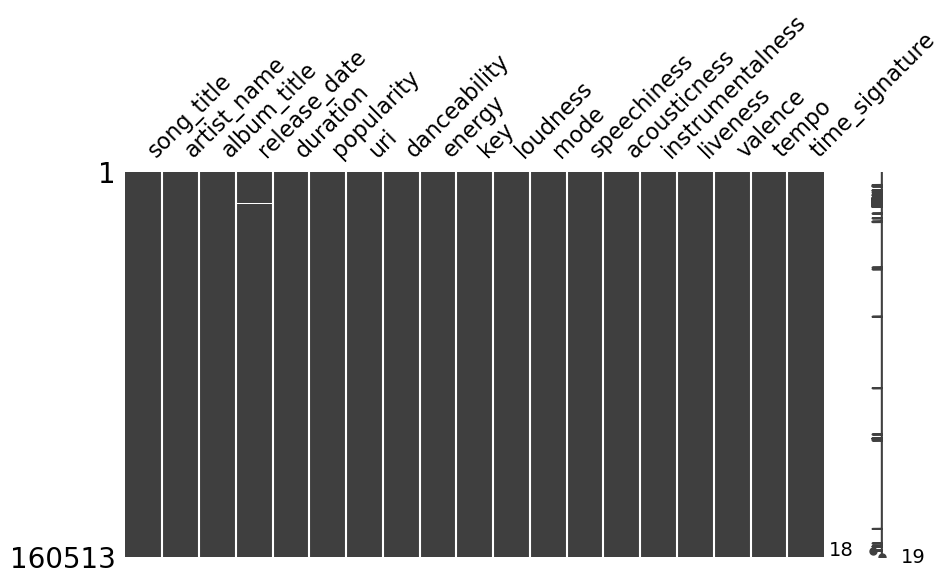

In [25]:
#  check if there are any null values
msno.matrix(spotify_df, figsize=(10,5))

Once again, we see that most of the features have no missing values.

The exception to this observation, of course, is the *release_date* column. We shall examine this column further.

In [26]:
#  display rows with missing release_date
missing_rows = spotify_df["release_date"].isnull()
spotify_df[missing_rows]

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
5443,In the Shadow of the Valley,,,None,187000,0,spotify:local:::In+the+Shadow+of+the+Valley:187,0.7180,0.6650,8,-10.3690,1,0.1010,0.9170,0.0007,0.1100,0.7510,79.7250,4
5844,April Sweatpants,,,None,166000,0,spotify:local:::April+Sweatpants:166,0.5630,0.6630,1,-7.8000,0,0.0337,0.0430,0.0000,0.1210,0.7030,200.0150,4
6002,Gee (Korean Ver. MP3 only),SNSD,,None,205000,0,spotify:local:SNSD::Gee+%28Korean+Ver.+MP3+onl...,0.4670,0.4950,2,-15.4550,0,0.0516,0.1610,0.0171,0.0714,0.4480,146.0160,4
6003,Hero,,,None,194000,0,spotify:local:::Hero:194,0.5760,0.5790,6,-9.6280,1,0.0769,0.1600,0.0000,0.0777,0.9470,106.9780,4
6008,Beneath the Mask [With Lyrics] - Persona 5,,,None,285000,0,spotify:local:::Beneath+the+Mask+%5BWith+Lyric...,0.6630,0.7350,8,-5.9330,1,0.0275,0.0002,0.0255,0.0954,0.4180,114.0180,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156239,Turning Japanese,The Vapors,The 80's Pop Culture Box - Disc 1,None,224000,0,spotify:local:The+Vapors:The+80%27s+Pop+Cultur...,0.5240,0.5590,5,-8.3190,1,0.0298,0.1850,0.0001,0.1400,0.2020,140.0430,4
156240,Walk Like An Egyptian,Bangles,The 80's Pop Culture Box - Disc 7,None,204000,0,spotify:local:Bangles:The+80%27s+Pop+Culture+B...,0.7160,0.8280,11,-13.0650,1,0.1040,0.0117,0.0000,0.3010,0.7710,103.1550,4
156245,In The Sun,Blondie,Summer & Sun,None,160000,0,spotify:local:Blondie:Summer+%26+Sun:In+The+Su...,0.7960,0.9700,1,-5.1930,0,0.0371,0.0074,0.1950,0.6660,0.9610,130.0020,4
156258,Dear Prudence (Single),Siouxsie & the Banshees,The Best of Siouxsie and The Banshees,None,229000,0,spotify:local:Siouxsie+%26+the+Banshees:The+Be...,0.9280,0.5310,5,-6.5200,0,0.1610,0.0969,0.3140,0.1600,0.7650,109.9630,4


So, apparently there are around **130** missing values in the release_date feature.

Moreover, filtering the entries with missing release dates reveal to us that most of these entries are actually local tracks. This means that these were not officialy uploaded to Spotify because it was only on the user's personal devices. And that's why there were no release dates specified for these entries; Spotify really had no information regarding when that track was uploaded. 

Given this information, it seems that the best way to deal with these entries is to **remove them altogether**.

### Checking for duplicated values

In [27]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
spotify_duplicated = spotify_df.duplicated(subset=["uri"])
spotify_duplicated_num = spotify_duplicated.sum()
spotify_total = spotify_df.shape[0]
spotify_duplicated_percent = (spotify_duplicated_num / spotify_total) * 100

#  display duplicated entries
display(spotify_df[spotify_duplicated])
print(f"{spotify_duplicated_percent: .2f}% ({spotify_duplicated_num} of {spotify_total}) of the spotify dataset are duplicated entries.")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1200,Have You Ever Seen The Rain,Creedence Clearwater Revival,Pendulum (Expanded Edition),1970-12-07,160133,84,spotify:track:2LawezPeJhN4AWuSB0GtAU,0.7410,0.6970,0,-7.0280,1,0.0277,0.0664,0.0000,0.1330,0.7740,116.1090,4
1330,Payphone - Edit,Maroon 5,Overexposed (Deluxe),2012-01-01,231373,48,spotify:track:5cy3CNTBZbX8vZUIsu4p7K,0.7410,0.7830,4,-4.7910,1,0.0415,0.0150,0.0000,0.3020,0.5340,110.0020,4
1380,She Will Be Loved - Radio Mix,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,259453,79,spotify:track:4llK75pXNWZz6KAho2Gp16,0.6510,0.6630,0,-5.5690,0,0.0281,0.2280,0.0000,0.0994,0.4650,102.0000,4
1544,Too Good At Goodbyes,Sam Smith,The Thrill Of It All (Special Edition),2017-11-03,201000,76,spotify:track:3VlbOrM6nYPprVvzBZllE5,0.6810,0.3720,5,-8.2370,1,0.0432,0.6400,0.0000,0.1690,0.4760,91.8730,4
1651,Take Back Home Girl (Feat. Tori Kelly),Chris Lane,Take Back Home,2017-12-08,211426,0,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN,0.4940,0.7960,11,-3.9680,1,0.0738,0.3810,0.0000,0.0918,0.6460,159.9260,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160487,Who'll Stop The Rain,Creedence Clearwater Revival,Chronicle: 20 Greatest Hits,1976-01-01,148333,49,spotify:track:4hqhLTbu0YtJVIdMs5ysPK,0.6890,0.8980,11,-4.7040,1,0.0791,0.1890,0.7660,0.0770,0.6260,90.9700,4
160493,"The Downeaster ""Alexa""",Billy Joel,The Bridge/Storm Front/The Nylon Curtain(3 Pak),1982,223266,0,spotify:track:3BKN4JADczZGEul1wkTqUX,0.5390,0.6480,10,-8.2650,0,0.0664,0.0148,0.0000,0.1070,0.6760,167.9970,4
160499,Here Comes the Rain Again - Remastered Version,Eurythmics,Boxed,2005-11-11,294586,42,spotify:track:5vYhr2kgOonJtWeJq5qZzU,0.6690,0.3890,0,-11.5470,1,0.0306,0.6050,0.1600,0.0905,0.6490,130.0150,4
160505,Storm Coming,Gnarls Barkley,St. Elsewhere,2006-05-02,188160,31,spotify:track:0afDVuVu6iMIhU2zQ5lfPF,0.7300,0.7620,11,-5.3830,1,0.3220,0.0169,0.0749,0.1970,0.7440,79.0690,4


 28.53% (45787 of 160513) of the spotify dataset are duplicated entries.


One of the hazards of our data collection process was that there was a high chance that we would accidentally extract the same tracks from different playlists.

Evidently, this was the case, since 28.53% of our data is comprised of duplicated tracks. 

Because these tracks will only confuse our model by doubling the effect of a specific track, we the opt to **remove these tracks entirely**.

### Unique values in the dataset

In [28]:
#  counting how many unique values each column has
for col in spotify_df.columns:
    unique_col_count = spotify_df[col].nunique()
    print(f"{col}: {unique_col_count} unique values")

song_title: 91342 unique values
artist_name: 35193 unique values
album_title: 69065 unique values
release_date: 9153 unique values
duration: 58187 unique values
popularity: 100 unique values
uri: 114726 unique values
danceability: 1291 unique values
energy: 2500 unique values
key: 12 unique values
loudness: 24649 unique values
mode: 2 unique values
speechiness: 1573 unique values
acousticness: 4720 unique values
instrumentalness: 5387 unique values
liveness: 1721 unique values
valence: 1979 unique values
tempo: 58498 unique values
time_signature: 5 unique values


This pretty much aligns with what we expect from data. 

What is important to note here are the three categorical variables/features with distinct categories/labels:
- key
- mode
- time signature

We will look into the unique values of each of these features.

In [29]:
#  identifying categorical values from each column that is identified as categorical
#  but do not have a huge amount of unique values; in other words, they act like labels
select_categorical = ["key",
                      "mode",
                      "time_signature"
                      ]

for categ_col in select_categorical:
    uniq_val = sorted(spotify_df[categ_col].unique())
    print(f"{categ_col} : {uniq_val}")

key : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mode : [0, 1]
time_signature : [0, 1, 3, 4, 5]


Well their values are encoded as integers.

We provide its equivalent values in the tables below.

 **Equivalent categories**

 *Key*

| value | pitch class (key) |
|-----|-------------|
| 0 | C (also B♯, Ddouble flat) |
| 1 | C♯, D♭ (also Bdouble sharp) |
| 2 | D (also Cdouble sharp, Edouble flat) |
| 3 | D♯, E♭ (also Fdouble flat) |
| 4 | E (also Ddouble sharp, F♭) |
| 5 | F (also E♯, Gdouble flat) |
| 6 | F♯, G♭ (also Edouble sharp) |
| 7 | G (also Fdouble sharp, Adouble flat) |
| 8 | G♯, A♭ |
| 9 | A (also Gdouble sharp, Bdouble flat) |
| 10 | A♯, B♭ (also Cdouble flat) |
| 11 | B (also Adouble sharp, C♭) |


*Mode*

| value | mode |
|-------|------|
| 0 | minor |
| 1 | major |

*Time Signature*

| value | time signature |
|-------|----------------|
| 0 | 0/4 | 
| 1 | 1/4 |
| 3 | 3/4 |
| 4 | 4/4 |
| 5 | 5/4 |

We will now move on to cleaning our data.

## Data Cleaning & Feature Engineering

#### Convert release_date column to datetime

In [30]:
#  converting dtype of column to its proper dtype
spotify_clean_df = spotify_df.copy()
spotify_clean_df["release_date"] = pd.to_datetime(spotify_clean_df.loc[:, "release_date"], errors="coerce")

#  verify what dtype the column is
display(spotify_clean_df.dtypes)

#  check number of missing entries 
empty_dates = spotify_clean_df["release_date"].isnull().sum()
print(f"There are now {empty_dates} empty dates though. Previously, it was {missing_rows.sum()}.")

song_title                  object
artist_name                 object
album_title                 object
release_date        datetime64[ns]
duration                     int64
popularity                   int64
uri                         object
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object

There are now 255 empty dates though. Previously, it was 130.


After converting the release date column to datetime, the number of empty values the column has increased. There were 125 more null values that were added. This probably means that there are dates in the column that did not folow the dominant format, or it was missing some information which could manifest as it lacking specificity (i.e., no day nor month nor year).

The entries that now have missing release dates will be dropped all the same anyway in the succeeding steps. 

### Drop entries with null values

In [31]:
#  for reference 
total_before_dropN = spotify_clean_df.copy().shape

print(f"Current total entries before dropping null values: {total_before_dropN[0]}")

Current total entries before dropping null values: 160513


<AxesSubplot:>

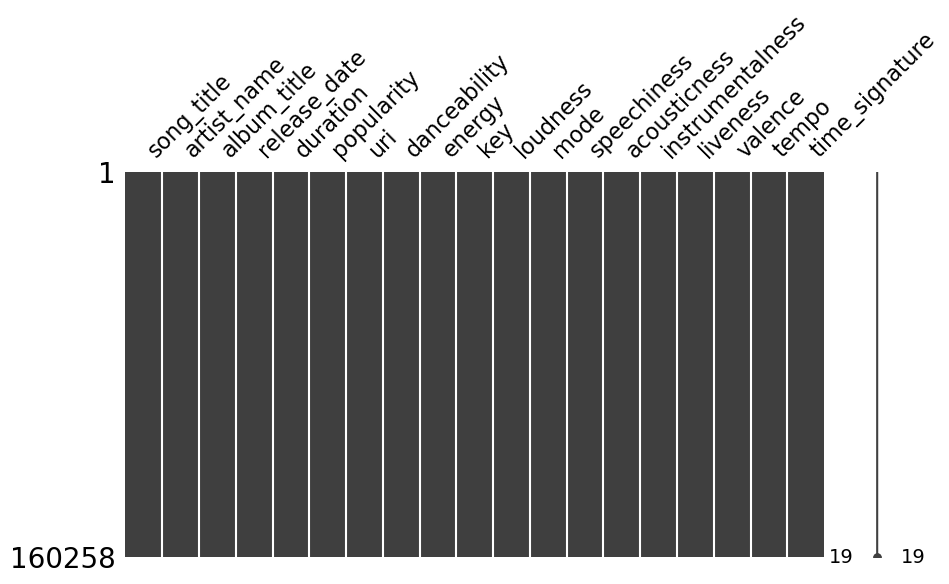

In [32]:
#  dropping rows with empty release dates
spotify_clean_df = spotify_clean_df.dropna(subset=["release_date"])

#  check if there are any null values
msno.matrix(spotify_clean_df, figsize=(10,5))

In [33]:
total_after_dropN = spotify_clean_df.shape
drop_countN = total_before_dropN[0] - total_after_dropN[0]

print(f"Current total entries: {total_after_dropN[0]} from {total_before_dropN[0]}")
print(f"Entries removed: {drop_countN}")

Current total entries: 160258 from 160513
Entries removed: 255


### Drop duplicated entries

In [34]:
#  for reference 
total_before_dropD = spotify_clean_df.copy().shape

print(f"Current total entries before dropping duplicate values: {total_before_dropD[0]}")

Current total entries before dropping duplicate values: 160258


In [35]:
#  dropping duplicate rows 
spotify_clean_df = spotify_clean_df.drop_duplicates(subset=["uri"])
spotify_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,222026,57,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.3120,0.3990,2,-8.5060,1,0.0321,0.4710,0.5830,0.1300,0.1440,126.0250,4
1,comedy,Sion,love,2022-07-23,213275,48,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.8410,0.3670,5,-7.0850,1,0.0635,0.8690,0.0034,0.1140,0.1840,110.0460,4
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,383066,44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.4380,0.1560,2,-17.3110,1,0.0302,0.8830,0.2680,0.1050,0.2220,85.3440,4
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,311100,34,spotify:track:3UG4sW8T05V7raSbLA67o8,0.6220,0.7300,1,-7.7140,1,0.0368,0.0185,0.0004,0.1050,0.5380,117.0360,4
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,181973,53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.4170,0.1230,6,-16.5720,0,0.0377,0.9930,0.0125,0.1430,0.1800,137.4440,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160508,Raincoat,Crash Kings,Crash Kings,2009-01-01,237160,19,spotify:track:4cFfiJCmRfPd9H9p2s5AdT,0.6160,0.8280,11,-4.7360,1,0.1330,0.0058,0.0000,0.3520,0.5760,123.9860,4
160509,Such Sweet Thunder,Delfeayo Marsalis,Sweet Thunder: Duke & Shak,2011-01-18,363566,13,spotify:track:4diUG4YVYzfNL7a3cawE7N,0.6890,0.7010,8,-5.7430,1,0.0667,0.0253,0.0000,0.1540,0.4630,131.9880,4
160510,Rainy Days and Mondays,Pat Metheny,What's It All About,2011-06-14,432000,29,spotify:track:1Sv7zdEn0ez8ToEKsPiWWj,0.2340,0.8650,9,-5.1310,1,0.0516,0.0000,0.0005,0.2890,0.1940,137.1070,4
160511,Rain Drops Keep Falling On My Head (Re-Recorde...,B.J. Thomas,Guilty Pleasures (Re-Recorded / Remastered Ver...,2009-10-01,177028,0,spotify:track:1K3jYWWhRk5Gg8lVtEgbhK,0.7330,0.8990,0,-4.2370,1,0.1430,0.0050,0.0000,0.3720,0.7600,127.0860,4


In [36]:
total_after_dropD = spotify_clean_df.shape
drop_countD = total_before_dropD[0] - total_after_dropD[0]

print(f"Current total entries: {total_after_dropD[0]} from {total_before_dropD[0]}")
print(f"Entries removed: {drop_countD}")

Current total entries: 114506 from 160258
Entries removed: 45752


### Data validation

We are going to check if the entries in the dataset are all song tracks. 

To do this, we will try to manually comb over the albums and the artists first.

In [37]:
#  Checking if tracks extracted are actually songs rather than audiobook/podcasts
#  Manually checking aberant "albums" that will be removed from the dataset
spotify_clean_df.album_title.value_counts().sample(15).head(15)

Melancholia                                       1
Urban Hymns (Deluxe / Remastered 2016)            2
Away We Go Original Motion Picture Soundtrack     2
Puxa Saco                                         1
Baby Face                                         1
538 Hitzone 52                                    1
Kids Trap                                         3
Night Vibes                                       1
Eco                                               1
YESSIE                                            3
Play                                             10
Stop It (feat. Facey)                             1
indulge                                           1
I'm American                                      1
You, Yeah, You                                    2
Name: album_title, dtype: int64

In [38]:
#  Manually checking aberant "artists" that will be removed from the dataset
spotify_clean_df.artist_name.value_counts().sample(15).head(15)

Premiata Forneria Marconi    1
Ramses II                    1
Temps Zauvage                1
The Cinematic Orchestra      4
Bryce Drew                   1
Cathedrals                   1
BLVK JVCK                    4
The Great TV Crew            1
Tracie Spencer               1
Shermanology                 1
kubi                         1
All Out War                  1
Felipe e Rodrigo             1
Emilia Branco                7
Reggaeton Latino             1
Name: artist_name, dtype: int64

There seems to be a lot of albums that are specific to French tutorials. 

We focus our attention to these albums.

In [39]:
#  searching for albums that has the word french in their titles since this seems to be the most common deviant
spotify_clean_df[spotify_clean_df.album_title.str.contains("French")].album_title.value_counts().head()

Learn In Your Car: Verbs 101 French              86
English To French                                51
Learn in Your Car: French Level 1                45
Learn in Your Car: French Level 2                35
French-English Audio Dictionary For Beginners    31
Name: album_title, dtype: int64

These albums will be removed to make sure that most entries are music/song tracks.

In [40]:
#  for reference 
total_before_filter = spotify_clean_df.copy().shape

print(f"Current total entries before filtering out: {total_before_filter[0]}")

Current total entries before filtering out: 114506


We found other artists and albums that fall under audiobooks and spoken poetry in the dataset. We will remove these promptly. 

In [41]:
deviant_albums = ["Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "The Velveteen Rabbit",
                  "French-English Audio Dictionary For Beginners",
                  "Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "Learn in Your Car: French Level 2",
                  "French-English Audio Dictionary For Beginners",
                  "Learn in Your Car: French Level 3",
                  "Learn to Speak French: English-French Phrase and Word Audio Book",
                  "Learn French Words",
                  "VocabuLearn® Word Boosters French",
                  "Speak and Read French, Part 3: French Literature",
                  "Vocabulearn ® French - English Level 3",
                  "Vocabulearn ® French - English Level 2",
                  "Vocabulearn ® French - English Level 1",
                  "Speak and Read French, Vol. 2: Basic and Intermediate",
                  "Speak and Read French, Vol. 1: Basic",
                  "Learn French - Easily, Effectively, and Fluently",
                  "English to French - Useful Phrases",
                  "Learn French Fast",
                  "Learn French Self-Taught - Franz Thimm",
                  "Easy Conversations in French - Gustave Chouquet",
                  "An Interview with Kris Needs",
                  "Civil Rights vs. Social Privilege",
                  "More Ghost Stories by M. R. James",
                  "The Halloween Poetry Collection",
                  ]

deviant_artists = ["Orange",
                   "DBS Audiobooks",
                   "VANTAGE"
                   ]

#  removing the previously listed albums and artists
sans_devalbums = ~spotify_clean_df["album_title"].isin(deviant_albums)
sans_devartists = ~spotify_clean_df["artist_name"].isin(deviant_artists)
spotify_clean_df = spotify_clean_df[sans_devalbums & sans_devartists]
display(spotify_clean_df.sample(5))

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
56656,And the guitar plays on,Zig Zagger,Baker's Dozen,2021-09-27,155357,41,spotify:track:5Vs3zHvwNJn03ZN5Qg7NBE,0.7200,0.3990,8,-13.7410,0,0.0449,0.4140,0.9100,0.1090,0.8120,140.6610,4
55794,Eden Portal,Otik,Eden Portal,2022-06-08,366500,31,spotify:track:0ihmZ14TyzjrjO390cP1Oo,0.7210,0.7500,1,-5.4880,1,0.3680,0.0144,0.0000,0.6140,0.3850,117.6360,3
115514,FEELINGS,Timmy Albert,FEELINGS,2020-03-13,194677,56,spotify:track:4ALbe87DTDCYftbxXpc2Y4,0.7940,0.7930,11,-4.5210,0,0.0842,0.0125,0.0000,0.0952,0.6770,123.9410,4
42479,Wild Sweet,Starling Arrow,Wild Sweet,2022-10-07,322693,34,spotify:track:0cBD8fSoXyUvnjRLvGVlXB,0.4460,0.4300,5,-6.8270,1,0.0282,0.5310,0.0022,0.1150,0.3840,168.8340,4
41685,Stay Alive,José González,Stay Alive (From The Secret Life Of Walter Mitty),2013-01-01,266906,67,spotify:track:0ZNYGrmcehorhh9JOeg5Iv,0.4810,0.2990,10,-14.6340,1,0.0344,0.2320,0.0001,0.1750,0.5250,126.8680,4


In [42]:
total_after_filter = spotify_clean_df.shape
filter_count = total_before_filter[0] - total_after_filter[0]

print(f"Current total entries: {total_after_filter[0]} from {total_before_filter[0]}")
print(f"Entries removed: {filter_count}")

Current total entries: 113947 from 114506
Entries removed: 559


### Scaling specific features
 
 We will scale the values for the specifc audio features/qualities. 

In [43]:
to_scale = ["danceability",
            "energy",
            "loudness",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "liveness",
            "valence",
            "tempo",
            "popularity"
            ]

spotify_scaled_df = spotify_clean_df.copy()

scaler = MinMaxScaler()

spotify_scaled_df.loc[:, to_scale] = scaler.fit_transform(spotify_scaled_df.loc[:, to_scale])

spotify_scaled_df[to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,"113,947.0000",0.5697,0.1825,0.0000,0.4544,0.5872,0.7018,1.0000
energy,"113,947.0000",0.5829,0.2669,0.0000,0.3980,0.6280,0.8030,1.0000
loudness,"113,947.0000",0.8084,0.1039,0.0000,0.7818,0.8397,0.8745,1.0000
speechiness,"113,947.0000",0.0811,0.0973,0.0000,0.0361,0.0472,0.0785,1.0000
acousticness,"113,947.0000",0.3568,0.3475,0.0000,0.0343,0.2269,0.6687,1.0000
instrumentalness,"113,947.0000",0.1670,0.3228,0.0000,0.0000,0.0001,0.0631,1.0000
liveness,"113,947.0000",0.2021,0.1857,0.0000,0.0967,0.1220,0.2420,1.0000
valence,"113,947.0000",0.4720,0.2614,0.0000,0.2573,0.4645,0.6837,1.0000
tempo,"113,947.0000",0.4978,0.1232,0.0000,0.4035,0.4995,0.5748,1.0000
popularity,"113,947.0000",0.3631,0.2224,0.0000,0.2200,0.4000,0.5200,1.0000


### Converting duration from ms to min 

We will be converting the values in the duration feature from milliseconds to minutes so that we can easily comprehend the values.

In [44]:
spotify_clean_df = spotify_scaled_df.copy()

In [45]:
spotify_clean_df.loc[:, 'duration'] = spotify_scaled_df.loc[:, 'duration'] / 60000
spotify_clean_df.duration.describe()

count   113,947.0000
mean          3.8634
std           3.0926
min           0.0244
25%           2.9375
50%           3.5242
75%           4.2220
max         260.9000
Name: duration, dtype: float64

From here we can easily understand how long songs are since these are units that we often work with.

### Get specific year when track was released (release_year)

In [46]:
spotify_clean_df.loc[:, "release_year"] = spotify_clean_df.loc[:, "release_date"].dt.year

spotify_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,3.7004,0.5700,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.3164,0.3990,2,0.8246,1,0.0332,0.4729,0.5830,0.1300,0.1441,0.5247,4,2022
1,comedy,Sion,love,2022-07-23,3.5546,0.4800,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.8529,0.3670,5,0.8474,1,0.0656,0.8725,0.0034,0.1140,0.1842,0.4582,4,2022
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,6.3844,0.4400,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.4442,0.1560,2,0.6836,1,0.0312,0.8865,0.2680,0.1050,0.2222,0.3553,4,2009
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,5.1850,0.3400,spotify:track:3UG4sW8T05V7raSbLA67o8,0.6308,0.7300,1,0.8373,1,0.0380,0.0186,0.0004,0.1050,0.5385,0.4873,4,2021
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,3.0329,0.5300,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.4229,0.1230,6,0.6955,0,0.0389,0.9970,0.0125,0.1430,0.1802,0.5722,3,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160508,Raincoat,Crash Kings,Crash Kings,2009-01-01,3.9527,0.1900,spotify:track:4cFfiJCmRfPd9H9p2s5AdT,0.6247,0.8280,11,0.8850,1,0.1374,0.0058,0.0000,0.3520,0.5766,0.5162,4,2009
160509,Such Sweet Thunder,Delfeayo Marsalis,Sweet Thunder: Duke & Shak,2011-01-18,6.0594,0.1300,spotify:track:4diUG4YVYzfNL7a3cawE7N,0.6988,0.7010,8,0.8689,1,0.0689,0.0254,0.0000,0.1540,0.4635,0.5495,4,2011
160510,Rainy Days and Mondays,Pat Metheny,What's It All About,2011-06-14,7.2000,0.2900,spotify:track:1Sv7zdEn0ez8ToEKsPiWWj,0.2373,0.8650,9,0.8787,1,0.0533,0.0000,0.0005,0.2890,0.1942,0.5708,4,2011
160511,Rain Drops Keep Falling On My Head (Re-Recorde...,B.J. Thomas,Guilty Pleasures (Re-Recorded / Remastered Ver...,2009-10-01,2.9505,0.0000,spotify:track:1K3jYWWhRk5Gg8lVtEgbhK,0.7434,0.8990,0,0.8930,1,0.1477,0.0050,0.0000,0.3720,0.7608,0.5291,4,2009


## Exploratory Data Analysis 

#### Summary Statistics

In [47]:
# Summary Statistics
spotify_clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,"113,947.0000",3.8634,3.0926,0.0244,2.9375,3.5242,4.2220,260.9000
popularity,"113,947.0000",0.3631,0.2224,0.0000,0.2200,0.4000,0.5200,1.0000
danceability,"113,947.0000",0.5697,0.1825,0.0000,0.4544,0.5872,0.7018,1.0000
energy,"113,947.0000",0.5829,0.2669,0.0000,0.3980,0.6280,0.8030,1.0000
key,"113,947.0000",5.2179,3.5677,0.0000,2.0000,5.0000,8.0000,11.0000
loudness,"113,947.0000",0.8084,0.1039,0.0000,0.7818,0.8397,0.8745,1.0000
mode,"113,947.0000",0.6646,0.4721,0.0000,0.0000,1.0000,1.0000,1.0000
speechiness,"113,947.0000",0.0811,0.0973,0.0000,0.0361,0.0472,0.0785,1.0000
acousticness,"113,947.0000",0.3568,0.3475,0.0000,0.0343,0.2269,0.6687,1.0000
instrumentalness,"113,947.0000",0.1670,0.3228,0.0000,0.0000,0.0001,0.0631,1.0000


In [48]:
# Aggregate numeric values by year
spotify_year_df = spotify_clean_df.groupby(['release_year']).agg({'song_title': 'count', 
                                                          'duration': ['mean', 'min', 'max', 'std'],
                                                         'danceability': ['mean', 'min', 'max', 'std'],
                                                         'energy': ['mean', 'min', 'max', 'std'],
                                                         'loudness': ['mean', 'min', 'max', 'std'],
                                                         'speechiness': ['mean', 'min', 'max', 'std'],
                                                         'acousticness': ['mean', 'min', 'max', 'std'],
                                                         'instrumentalness': ['mean', 'min', 'max', 'std'],
                                                         'liveness': ['mean', 'min', 'max', 'std'],
                                                         'valence': ['mean', 'min', 'max', 'std'],
                                                         'tempo': ['mean', 'min', 'max', 'std'],
                                                         'key': ['mean', 'min', 'max', 'std'],
                                                         'mode': ['mean', 'min', 'max', 'std'],
                                                         'time_signature': ['mean', 'min', 'max', 'std'],})
spotify_year_df['duration'].tail(10)

,mean,min,max,std
release_year,,,,
2013,4.4124,0.2434,73.4236,4.7227
2014,4.7491,0.2983,100.0110,7.0716
2015,3.8529,0.1537,181.8334,3.2414
2016,4.2495,0.0913,260.9000,8.1024
2017,3.7041,0.1688,20.8393,1.2847
2018,3.6311,0.4898,23.0967,1.1503
2019,3.5860,0.2900,29.7838,1.4072
2020,3.5539,0.6070,21.6086,1.2256
2021,3.3545,0.6181,22.4000,1.1640


In [49]:
# Get artist count of the dataset
len(spotify_clean_df.groupby(['artist_name']).count())

#### 1.) What year did we collect the most songs?



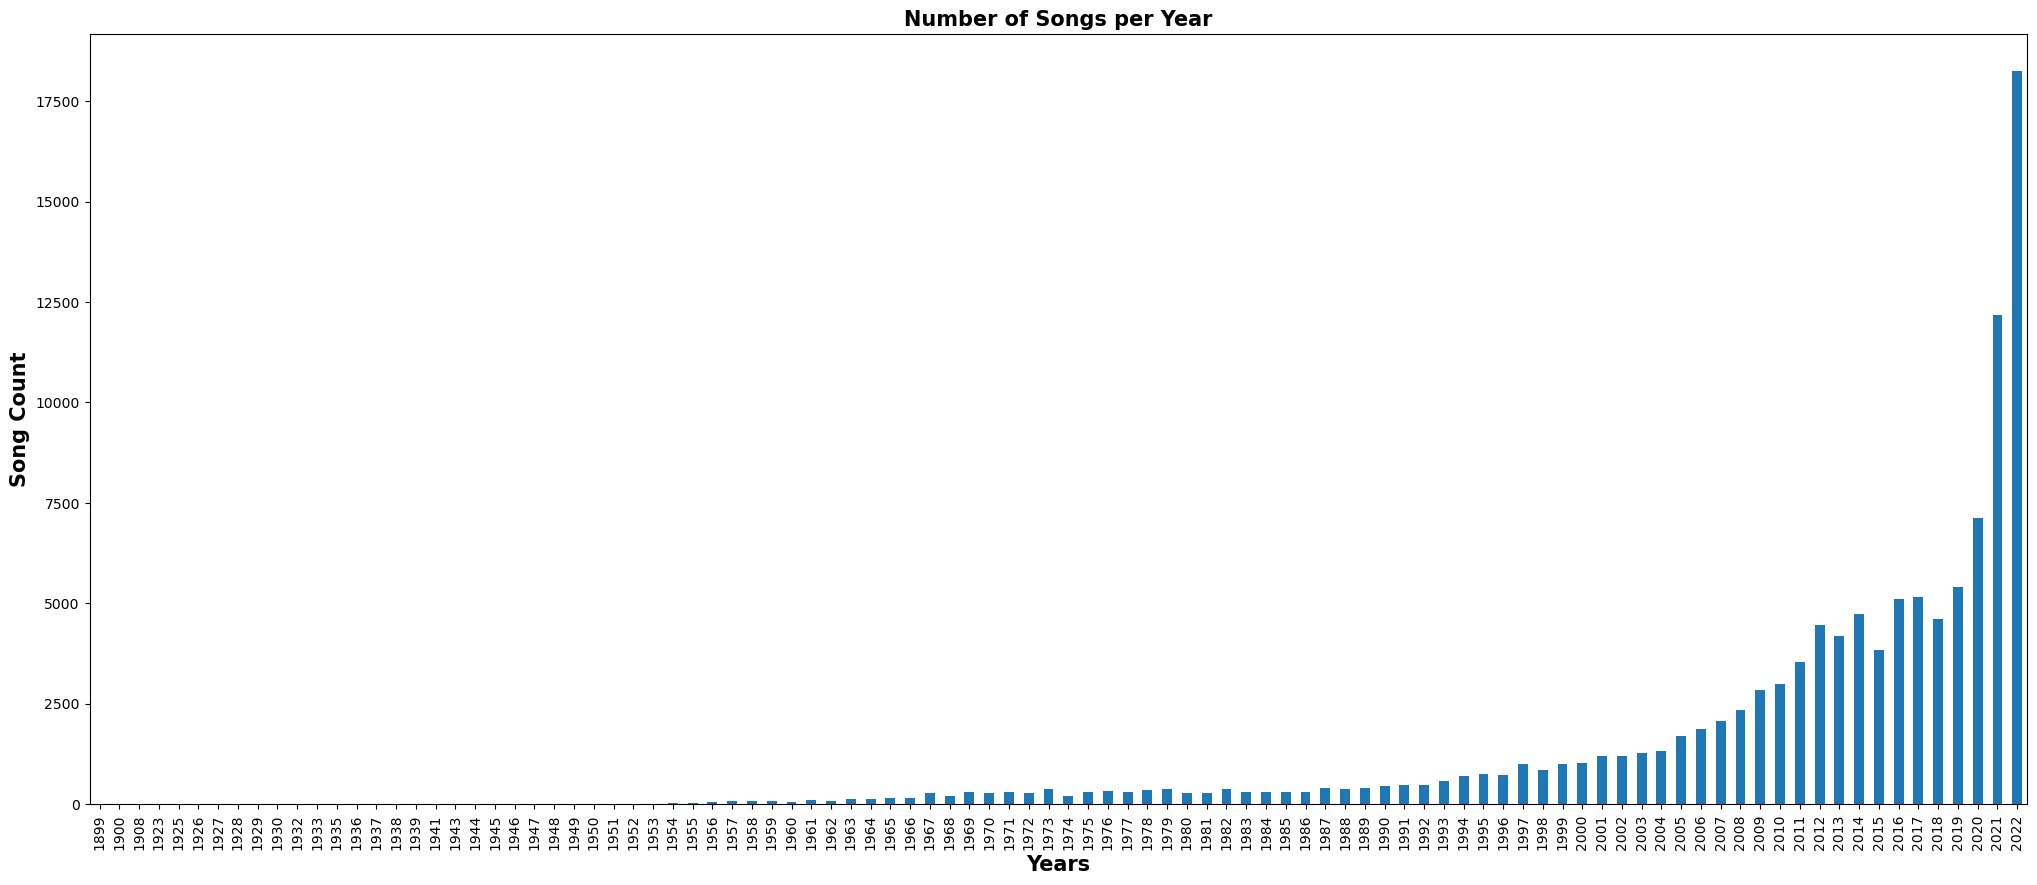

In [50]:
# Number of songs per year
spotify_year_df['song_title']['count'].plot(kind='bar', figsize=(25,10))
plt.title('Number of Songs per Year', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Years', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song Count', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

The bargraph entitled, *Number of Songs per Year* shows that the year 2022 contains the most songs that was collected from the dataset. This is valued to over 17,500 songs from the aforementioned year alone. Following this are the years: 2021 and 2022 with 12,500 and 7,500 songs respectively. On the other hand, the years 1953 and below shows no song at all.



#### 2.) How long are most songs?

In [51]:
#average duration of songs
spotify_clean_df.duration.mean()

The data shows that the mean for the average duration of the songs is valued at 3.863. This means that the majority of the songs is 3.863 minutes long.

#### 3.) What are the average factors of the variables in the dataset?

In [52]:
relevant_qualities = ["danceability",
                      "energy",
                      "loudness",
                      "speechiness",
                      "acousticness",
                      "instrumentalness",
                      "liveness",
                      "valence",
                      "tempo",
                      "popularity"
                      ]

In [53]:
ave_song_qualities = spotify_clean_df[relevant_qualities].mean()

In [54]:
#  kindly visualize this with a line_polar using plotly express
fig = px.line_polar(ave_song_qualities, 
                    r=ave_song_qualities,
                    theta=relevant_qualities,
                    line_close=True,
                    title="Average Factors of All Songs")

fig.update_layout(
    autosize=False,
    width=800,
    height=400)

fig.show()

c:\Users\Lenovo\anaconda3\envs\DataScience\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


From the dataset retrieved, the list above represents the average values of the factors being utilized in this research. It is to be noted that the factor *key* contains the highest average with the value of 5.217926, while the factor *instrumentalness* contains the lowest average with the value 0.166999.

#### 4.)  Who are the most popular artists?

In [55]:
popular_songs = spotify_clean_df[spotify_clean_df.popularity.ge(.7)].sort_values(by="popularity", ascending=False)

popular_songs

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
21104,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,3.3156,1.0000,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,0.4057,0.6470,2,0.8443,1,0.0348,0.1767,0.0001,0.1100,0.2743,0.3501,4,2022
21085,I'm Good (Blue),David Guetta,I'm Good (Blue),2022-08-26,2.9206,0.9800,spotify:track:4uUG5RXrOk84mYEfFvj3cK,0.5974,0.8290,8,0.8830,0,0.0343,0.0197,0.0000,0.1280,0.5636,0.5079,4,2022
21118,Me Porto Bonito,Bad Bunny,Un Verano Sin Ti,2022-05-06,2.9761,0.9800,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,0.6359,0.8580,11,0.9156,0,0.3988,0.2641,0.0000,0.2100,0.3423,0.3852,4,2022
21097,La Bachata,Manuel Turizo,La Bachata,2022-05-26,2.7106,0.9800,spotify:track:5ww2BF9slyYgNOk37BlC4u,0.6237,0.7820,11,0.9066,1,0.0342,0.0174,0.0000,0.1890,0.5626,0.4037,4,2022
21092,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,2022-05-06,4.0619,0.9800,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,0.6369,0.6320,9,0.8658,1,0.0336,0.2580,0.0000,0.2880,0.5596,0.5739,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53368,YES or YES,TWICE,YES or YES,2018-11-05,3.9613,0.7000,spotify:track:26OVhEqFDQH0Ij77QtmGP9,0.6339,0.9030,4,0.9205,1,0.0614,0.0060,0.0000,0.2350,0.8258,0.6077,4,2018
13410,One For The Road,Arctic Monkeys,AM,2013-09-09,3.4342,0.7000,spotify:track:6wNUBZNWFxdUGof6vkaykE,0.7880,0.3750,1,0.8133,1,0.5248,0.3926,0.0000,0.1790,0.8719,0.2516,5,2013
101785,Almost Is Never Enough,Ariana Grande,Yours Truly,2013-01-01,5.4629,0.7000,spotify:track:442j8VxaB60dWf9cBFuX5w,0.3053,0.0521,3,0.5340,1,0.0398,0.9970,0.9440,0.1710,0.0593,0.7623,4,2013
101787,When You're Gone,Avril Lavigne,The Best Damn Thing (Expanded Edition),2007-04-17,4.0082,0.7000,spotify:track:54JKnDB3CzVu8wNAOM27BI,0.3895,0.0178,5,0.4260,0,0.0324,0.9980,0.9390,0.1140,0.1642,0.2560,4,2007


In [56]:
top_artists = popular_songs.groupby(by="artist_name")["popularity"].count().sort_values(ascending=False).head(15)

top_artists

artist_name
Drake             64
Taylor Swift      60
The Weeknd        46
Ed Sheeran        34
Rihanna           33
Harry Styles      32
Kanye West        31
Justin Bieber     30
Katy Perry        30
Kendrick Lamar    29
Beyoncé           28
Billie Eilish     28
Coldplay          25
Bruno Mars        25
Ariana Grande     24
Name: popularity, dtype: int64

The table found in this section displays the values of the factors of a song together with its artist. According to the data being shown, Drake and Taylor Swift are considered the top artist with a score of 64 and 60 respectively.

#### 5.) What are the avergage factors of the songs from most of the popular artists?

In [57]:
popartist_song_qualities = popular_songs.loc[popular_songs.artist_name.isin(top_artists.index)]
popartist_song_qualities = popartist_song_qualities.groupby(by="artist_name")[relevant_qualities].mean()
popartist_song_qualities

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
artist_name,,,,,,,,,,
Ariana Grande,0.5814,0.5346,0.8358,0.0747,0.3100,0.0406,0.1962,0.3960,0.5284,0.7658
Beyoncé,0.5914,0.6595,0.8396,0.1145,0.1913,0.0397,0.1968,0.5527,0.4927,0.7689
Billie Eilish,0.6155,0.5589,0.8169,0.1182,0.3608,0.0788,0.2190,0.4622,0.5002,0.7950
Bruno Mars,0.7250,0.6433,0.8617,0.0948,0.1616,0.0005,0.1436,0.5374,0.5195,0.7768
Coldplay,0.5491,0.6414,0.8315,0.0719,0.2178,0.0570,0.1791,0.4002,0.4939,0.7856
Drake,0.6787,0.6761,0.8599,0.1120,0.1508,0.0179,0.2116,0.5250,0.5117,0.7578
Ed Sheeran,0.6095,0.5470,0.8323,0.0592,0.4037,0.0567,0.1581,0.4522,0.4539,0.7718
Harry Styles,0.5483,0.5629,0.8430,0.0619,0.3693,0.0220,0.1735,0.4657,0.4971,0.8069
Justin Bieber,0.5712,0.7411,0.8690,0.0861,0.1660,0.0604,0.2473,0.4816,0.5099,0.7573


In [58]:
#  kindly visualize this with a line_polar using plotly express
fig = go.Figure()

for i in range(len(popartist_song_qualities)):
    fig.add_trace(go.Scatterpolar(
            r = popartist_song_qualities.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = popartist_song_qualities.index[i],
        ))
    
fig.update_layout(
    title = 'Average Factors of Popular Artists',
    showlegend = True,
    width=800, 
    height=400
)

fig.show()

The top 5 artists are Ariana Grande, Beyonce, Billie Eilish, Bruno Mars and Coldplay. They all exhibit high loudness, energy, and danceability,  moderate acousticness. tempo and valence, and low liveness and instrumentalness. 

The graph shows that The Weekend shows a very strong Valence with a value of 0.5911564, while Ariane Grande shows the lowest value of 0.3959877.

For the Liveliness, shows a weak relationship with the highest value of 0.24727 from Justin Bieber while Bruno Mars has the least with 0.143588.

There is a commonality with the instrumentalness with a weak relationship with the highest value from Kanye West (0.189013), while Bruno Mars contains the least.

While for the Acousticness, it shows a weak relationship with a highest value from Ed Sheeran (0.4036833) and Drake having 0.1507615.

The loudness contains the strongest relationship among the rest of the factors, with the value of 0.8616786 from Bruno Mars while Billie Eilish contains the least value of 0.8168565.

There is a commonality with the factors: Energy and Dance showing a similar level.


#### 6.) What are the average factors of most of the popular songs?

In [59]:
popsong_qualities = popular_songs.loc[:, relevant_qualities].mean()
popsong_qualities

danceability       0.6038
energy             0.6281
loudness           0.8327
speechiness        0.0868
acousticness       0.2719
instrumentalness   0.1033
liveness           0.1792
valence            0.5003
tempo              0.5028
popularity         0.7547
dtype: float64

In [60]:
#  kindly visualize this with a line_polar using plotly express
fig = px.line_polar(popsong_qualities, 
                    r=popsong_qualities,
                    theta=relevant_qualities,
                    line_close=True,
                    title="Average Factors of Most Popular Songs")

fig.update_layout(
    autosize=False,
    width=800,
    height=400)

fig.show()

c:\Users\Lenovo\anaconda3\envs\DataScience\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The top 5 artists are Ariana Grande, Beyonce, Billie Eilish, Bruno Mars and Coldplay. They all exhibit high loudness, energy, and danceability,  moderate acousticness. tempo and valence, and low liveness and instrumentalness.  

The visualization shows that loudness contains the strongest relationsip valuing with 0.8326745 while instrumentalness has the weakest with a value of 0.1032948.


#### 7.) What are the average values of each factors of the songs per year?

In [61]:
annual_song_qualities = spotify_clean_df.groupby(by="release_year")[relevant_qualities].mean()
annual_song_qualities = annual_song_qualities.sort_index(ascending=False)
annual_song_qualities

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
release_year,,,,,,,,,,
2022,0.5816,0.5533,0.7975,0.0850,0.3920,0.2463,0.1911,0.4472,0.4963,0.4666
2021,0.5596,0.5615,0.7902,0.0787,0.3875,0.2160,0.2034,0.4440,0.4925,0.4662
2020,0.5752,0.5726,0.8059,0.0879,0.3822,0.1710,0.2119,0.4704,0.4993,0.4401
2019,0.5761,0.5794,0.8071,0.0830,0.3831,0.1635,0.2191,0.4748,0.4971,0.4361
2018,0.5892,0.5870,0.8185,0.0776,0.3506,0.1414,0.2024,0.4807,0.4985,0.4173
...,...,...,...,...,...,...,...,...,...,...
1925,0.3580,0.2010,0.7582,0.0326,0.8916,0.0000,0.1250,0.3373,0.2901,0.0000
1923,0.3996,0.1741,0.7493,0.0337,0.8554,0.0023,0.0940,0.0902,0.5154,0.1900
1908,0.5472,0.4965,0.8295,0.0872,0.3630,0.0044,0.1070,0.5195,0.3041,0.3900


In [62]:
five_year_intervals = [2022,
                       2017,
                       2012,
                       2007,
                       2002,
                       1997,
                       1992,
                       1987,
                       1982,
                       1977]


five_year_qualities = annual_song_qualities.loc[five_year_intervals]

In [63]:
#  kindly visualize this with a line_polar using plotly express
fig = go.Figure()

for i, entry in enumerate(five_year_qualities):
    fig.add_trace(go.Scatterpolar(
            r = five_year_qualities.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = five_year_qualities.index[i].astype(str),
        ))
    
    
fig.update_layout(
    title = 'Average Factors of Popular Artists',
    showlegend = True,
    width=800, 
    height=400
)

fig.show()

The table in this section displays the average values of the factors over the years. The years covered in the data is from 1899 to 2022. For the latest year (2022), the following are the average values of the factors: Danceability, Energy, Loudness, Acousticness, Instrumentalness, Liveness, Valence, and Tempo in a respective manner: 0.581638, 0.553287, 0.797472, 0.392031, 0.246269, 0.191121, 0.447234 and 0.496286.

The radial chart also shows the average values of the factors from 1987 to 2022 with a five-year interval. This pretty much shows that songs have generally been consistent through the years. 

#### 8.) What factors are correlate with one another?

recall the criteria for the strength of correlations

| Absolute Value of Coefficient Correlation | Strength of Linear Relationship |
|-------------------------------------------|---------------------------------|
|0-0.2|Very Weak|
|0.2-0.4|Weak|
|0.4-0.6|Moderate|
|0.6-0.8|Strong|
|0.8-1.0|Very Strong|

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4832\2596031898.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



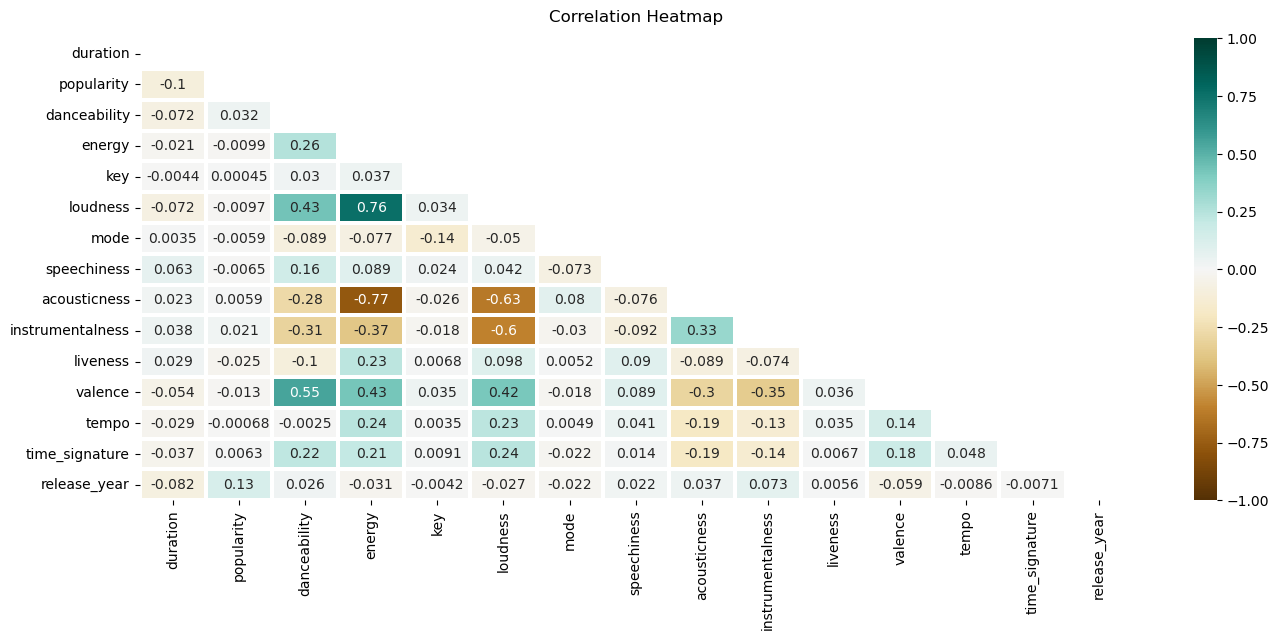

In [64]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(spotify_clean_df.corr(), dtype=np.bool))
heatmap=sns.heatmap(spotify_clean_df.corr(),mask=mask, vmin=-1,vmax=1,annot=True, cmap='BrBG', linewidths=1.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

[Text(0.5, 1.0, 'Instrumentalness vs Loudness Correlation')]

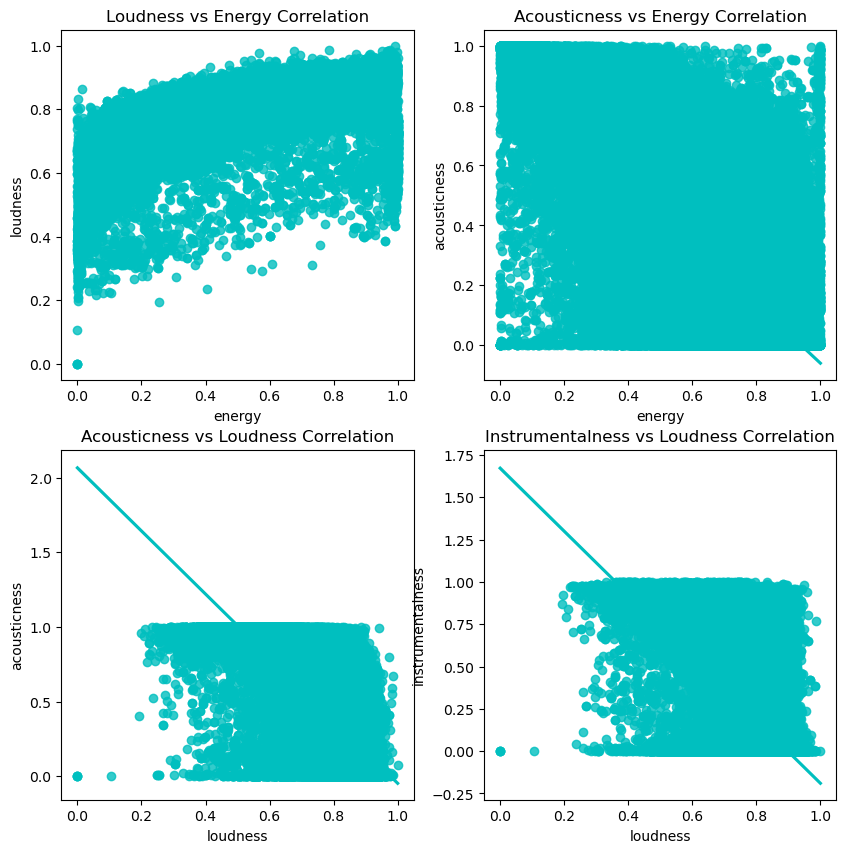

In [65]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.regplot(data=spotify_clean_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")

plt.subplot(2,2,2)
sns.regplot(data=spotify_clean_df, y="acousticness", x="energy", color="c").set(title="Acousticness vs Energy Correlation")

plt.subplot(2,2,3)
sns.regplot(data=spotify_clean_df, y="acousticness", x="loudness", color="c").set(title="Acousticness vs Loudness Correlation")

plt.subplot(2,2,4)
sns.regplot(data=spotify_clean_df, y="instrumentalness", x="loudness", color="c").set(title="Instrumentalness vs Loudness Correlation")

since the visualization shows too much data, we opt to get a sample data to show a better visualization

In [66]:
# get a sample dataframe
sample_df = spotify_clean_df.sample(int(0.004*len(spotify_clean_df)))   

print(len(sample_df))

455


[Text(0.5, 1.0, 'Instrumentalness vs Loudness Correlation')]

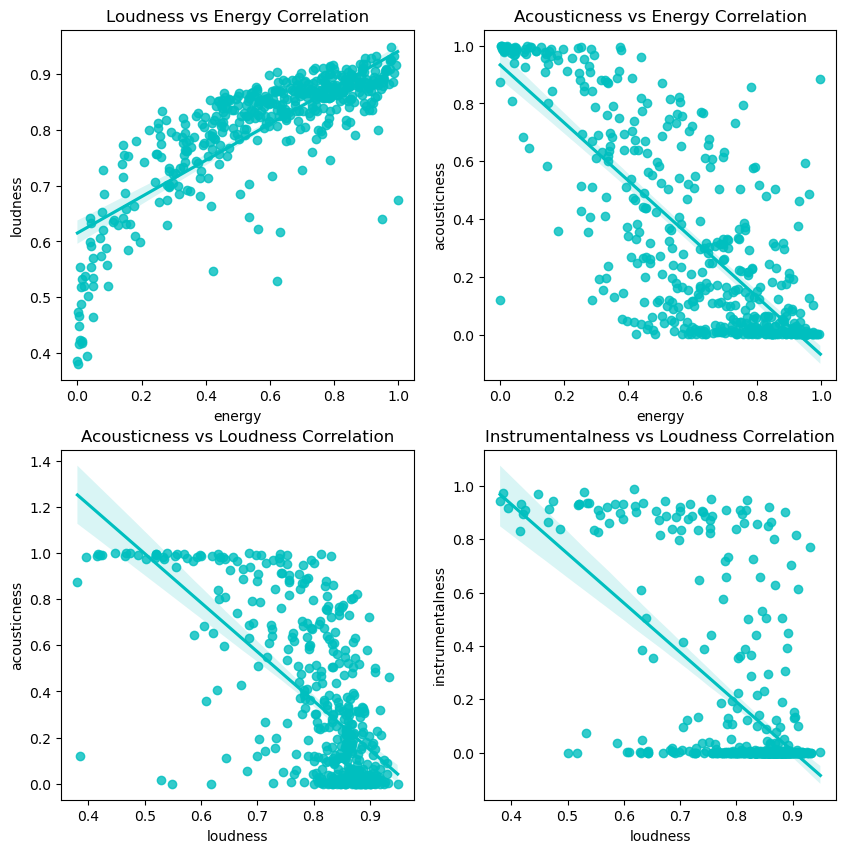

In [67]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.regplot(data=sample_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")

plt.subplot(2,2,2)
sns.regplot(data=sample_df, y="acousticness", x="energy", color="c").set(title="Acousticness vs Energy Correlation")

plt.subplot(2,2,3)
sns.regplot(data=sample_df, y="acousticness", x="loudness", color="c").set(title="Acousticness vs Loudness Correlation")

plt.subplot(2,2,4)
sns.regplot(data=sample_df, y="instrumentalness", x="loudness", color="c").set(title="Instrumentalness vs Loudness Correlation")

With the available dataset, the researchers conducted a heatmap to analyze the factors and its correlation with each other. The following factors are analyzed: *(1) Duration, (2) Loudness, (3) Valence, (4) Tempo, (5) Energy, (6) Acousticness and (7) Danceability*. The results of the data shows that *Loudness* and *Energy*; *Acousticness* and *Energy*; *Acousticness* and *Loudness*; and *Instrumental* and *Loudness* shows a **strong to very strong correlation** to each other.

### Additional analyses

In [68]:
# Create a top 100 songs dataframe (based on popularity)
spotify_top100_df = spotify_clean_df.sort_values(by=['popularity'], ascending=False).head(100)
spotify_clean_df.sort_values(by=['popularity'], ascending=False).iloc[100] # After top 100 > Song number 101

song_title                                      Believer
artist_name                              Imagine Dragons
album_title                                       Evolve
release_date                         2017-06-23 00:00:00
duration                                          3.4058
popularity                                        0.8800
uri                 spotify:track:0pqnGHJpmpxLKifKRmU6WP
danceability                                      0.4706
energy                                            0.7950
key                                                    1
loudness                                          0.8124
mode                                                   1
speechiness                                       0.0957
acousticness                                      0.0495
instrumentalness                                  0.0024
liveness                                          0.3990
valence                                           0.6126
tempo                          

In [69]:
# Create separate dataframe for remaining songs in the dataset
a = spotify_clean_df.sort_values(by=['popularity'], ascending=False)
b = spotify_top100_df #Top 100 songs

In [70]:
# Df for the rest of the dataset
spotify_out100_df = pd.merge(a,b, indicator=True, how='outer')
spotify_out100_df.head()

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,_merge
0,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,3.3156,1.0000,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,0.4057,0.6470,2,...,1,0.0348,0.1767,0.0001,0.1100,0.2743,0.3501,4,2022,both
1,Me Porto Bonito,Bad Bunny,Un Verano Sin Ti,2022-05-06,2.9761,0.9800,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,0.6359,0.8580,11,...,0,0.3988,0.2641,0.0000,0.2100,0.3423,0.3852,4,2022,both
2,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,2022-05-06,4.0619,0.9800,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,0.6369,0.6320,9,...,1,0.0336,0.2580,0.0000,0.2880,0.5596,0.5739,4,2022,both
3,I'm Good (Blue),David Guetta,I'm Good (Blue),2022-08-26,2.9206,0.9800,spotify:track:4uUG5RXrOk84mYEfFvj3cK,0.5974,0.8290,8,...,0,0.0343,0.0197,0.0000,0.1280,0.5636,0.5079,4,2022,both
4,La Bachata,Manuel Turizo,La Bachata,2022-05-26,2.7106,0.9800,spotify:track:5ww2BF9slyYgNOk37BlC4u,0.6237,0.7820,11,...,1,0.0342,0.0174,0.0000,0.1890,0.5626,0.4037,4,2022,both


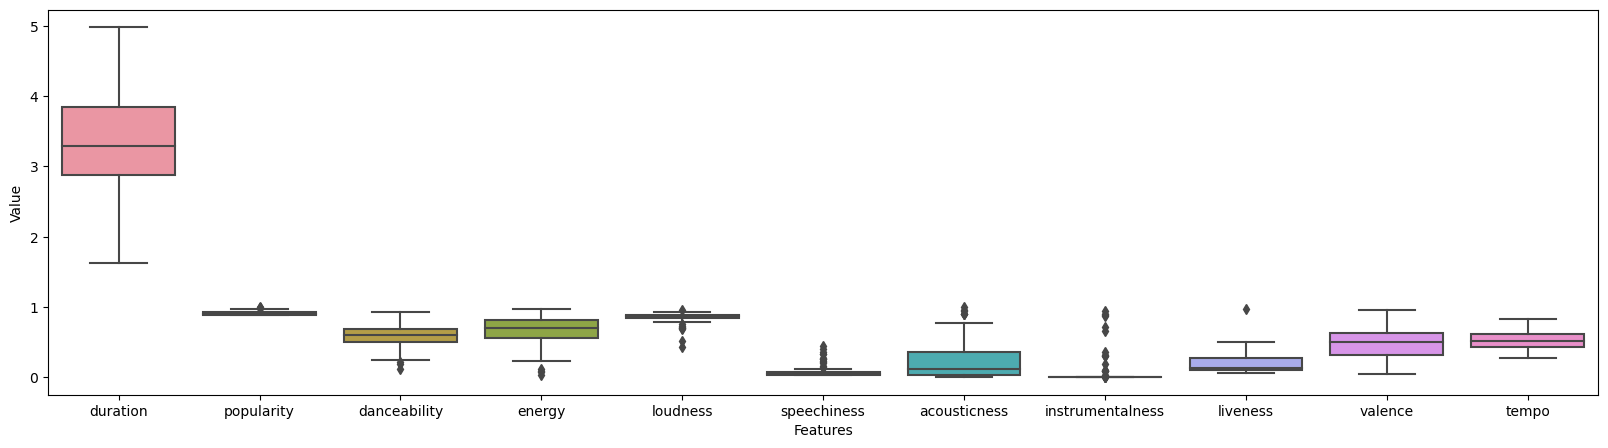

In [71]:
# Compare each audio feature of the top 100 songs with the rest of the dataset (box plots)
plt.figure(figsize=(20, 5))
sns.boxplot(data=spotify_top100_df.drop(['song_title','artist_name','release_date','uri','release_year', 'time_signature', 'mode', 'key'],axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

The researchers utilized Boxplots in order to show the pattern of each audio feature of the top 100 songs in the range of the other audio feature of the rest of the dataset. As seen in the visualization above, we can deduce that duration has a nearly normal distribution with no visible outliers or lesser variability. On the other hand, liveliness shows the most variability showing a greater outlier as compared to the rest of the features.

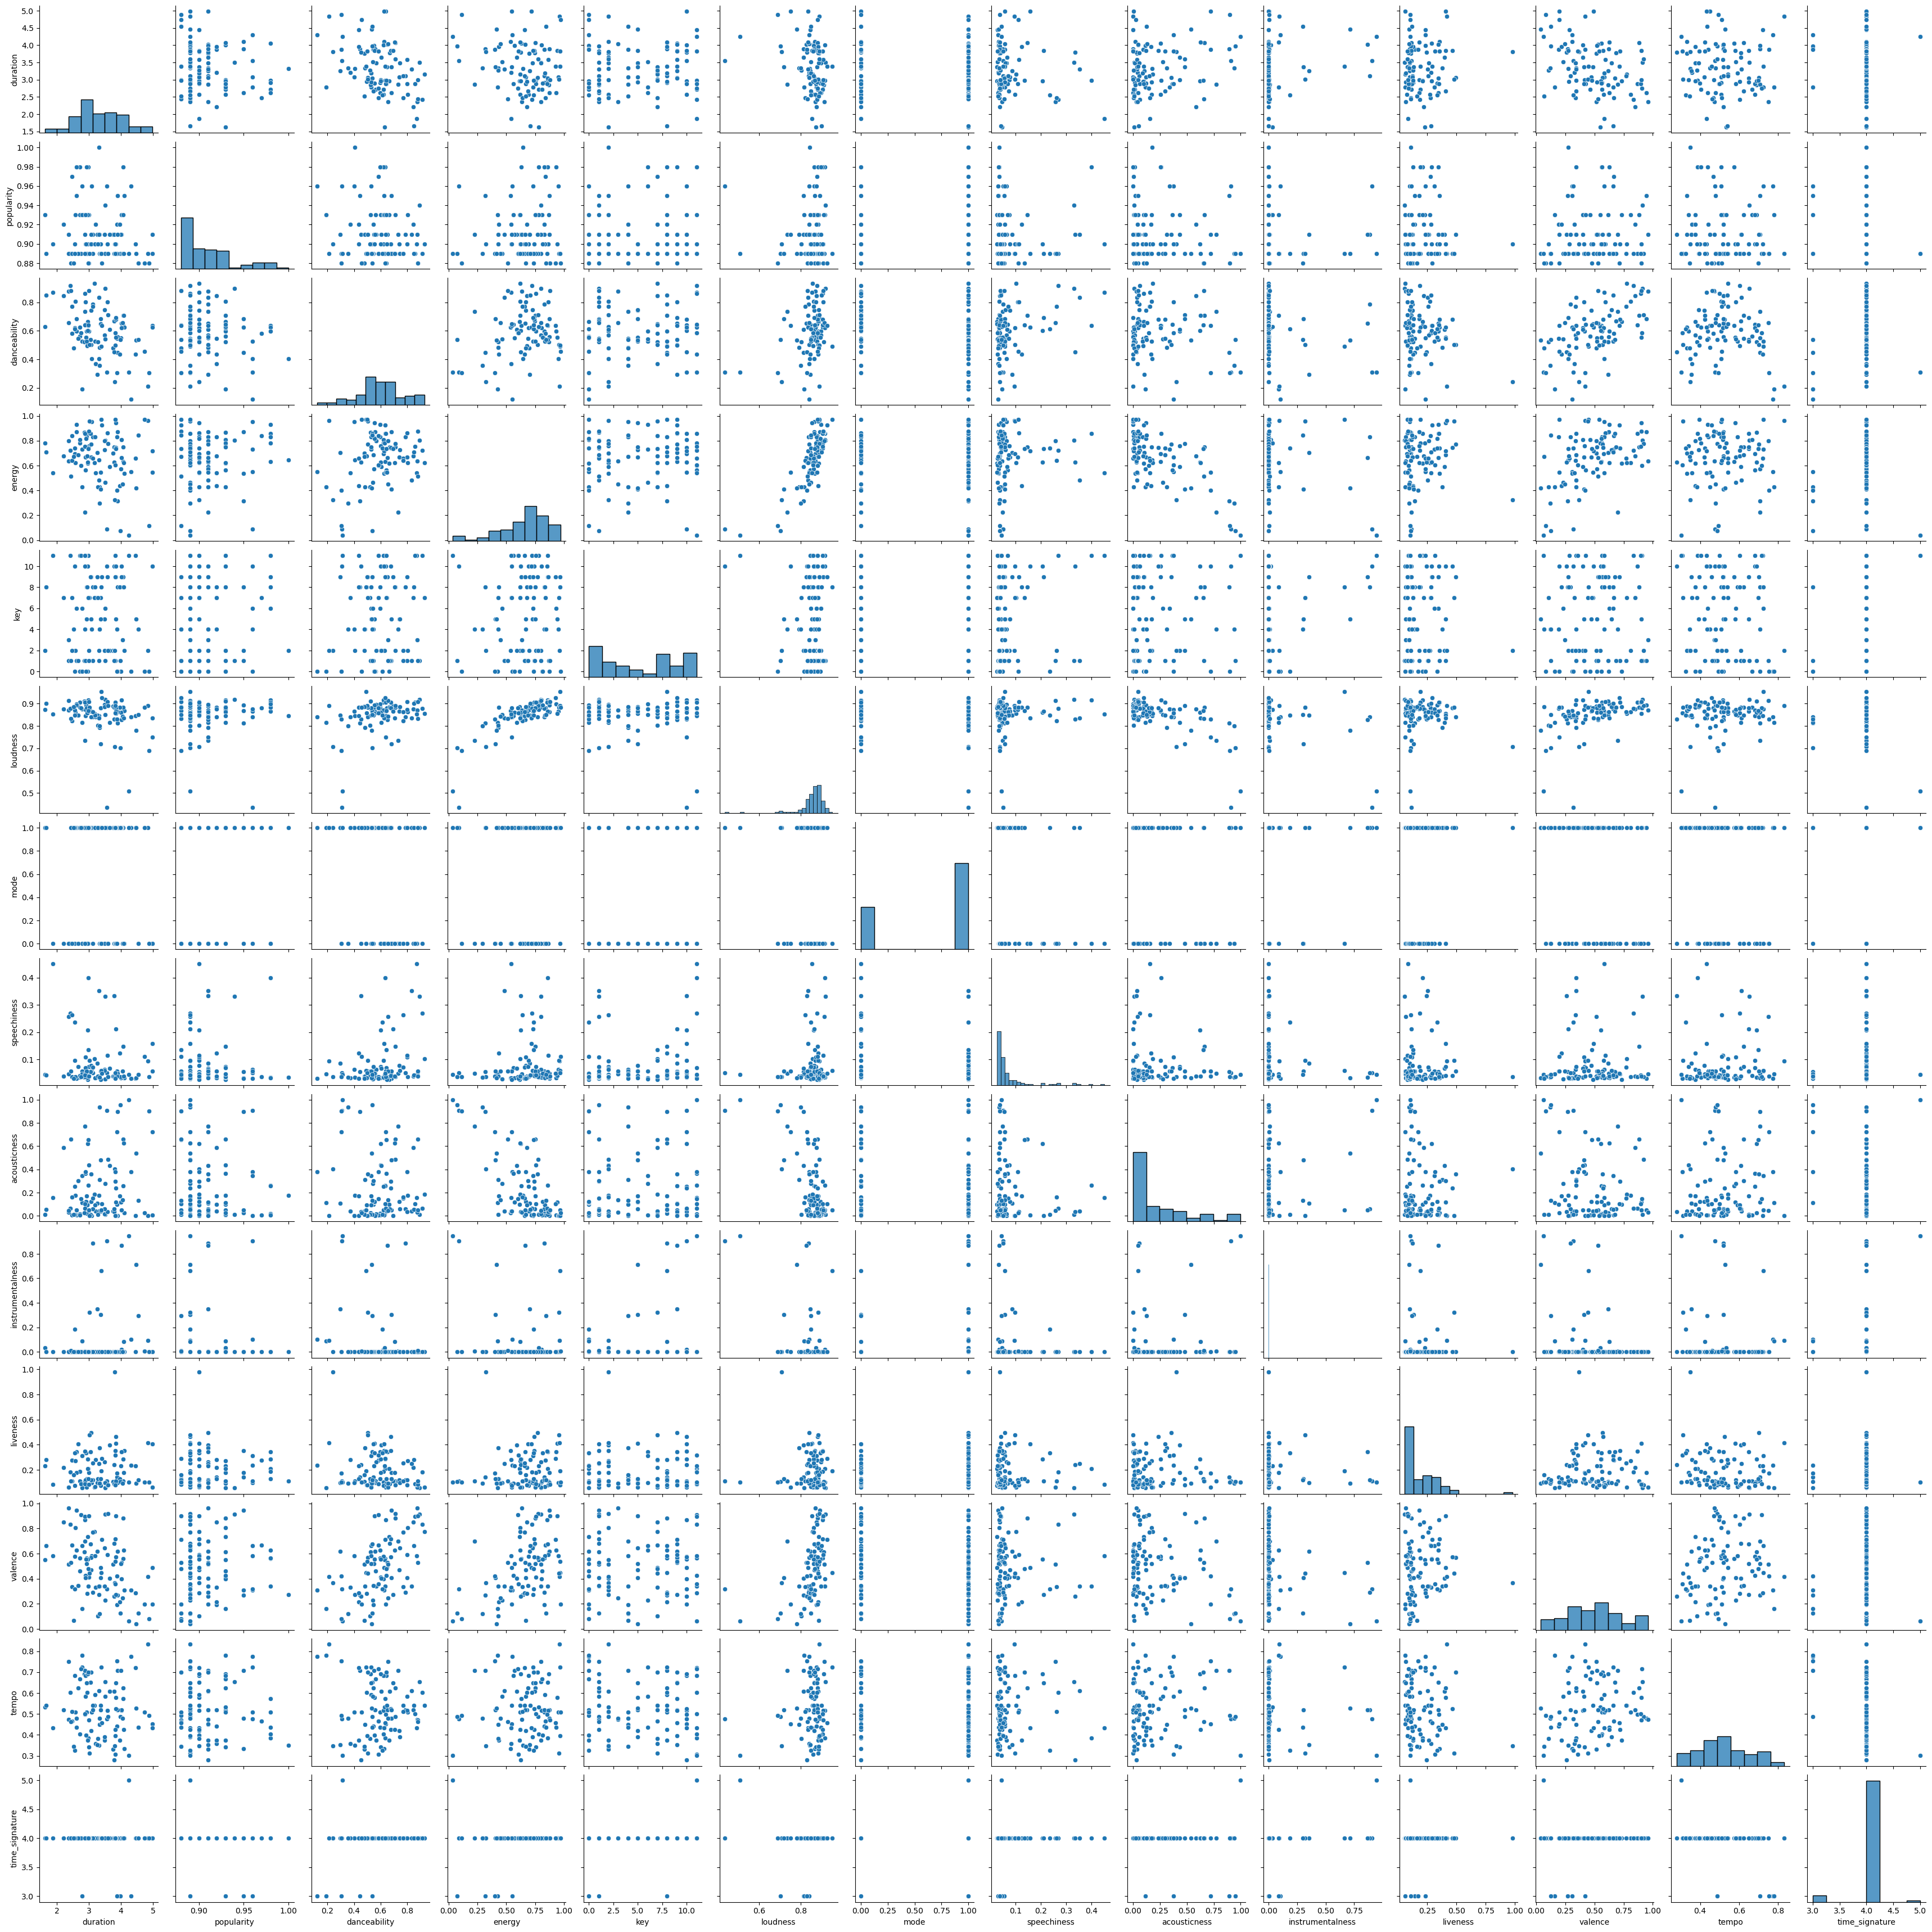

In [72]:
#Pairplot
sns.pairplot(data=spotify_top100_df.drop(['song_title','artist_name','release_date','uri','release_year'],axis=1))
plt.show()

A pairplot visualziation was used in order for the researchers to see the distribution of each feature while comparing the relationship of one another. As shown above, it represents that the variables are not normally distrbuted and shows a consolidated distribution. Despite this result, it would not affect the overall analyses because there is no assumption required to fulfill normality.

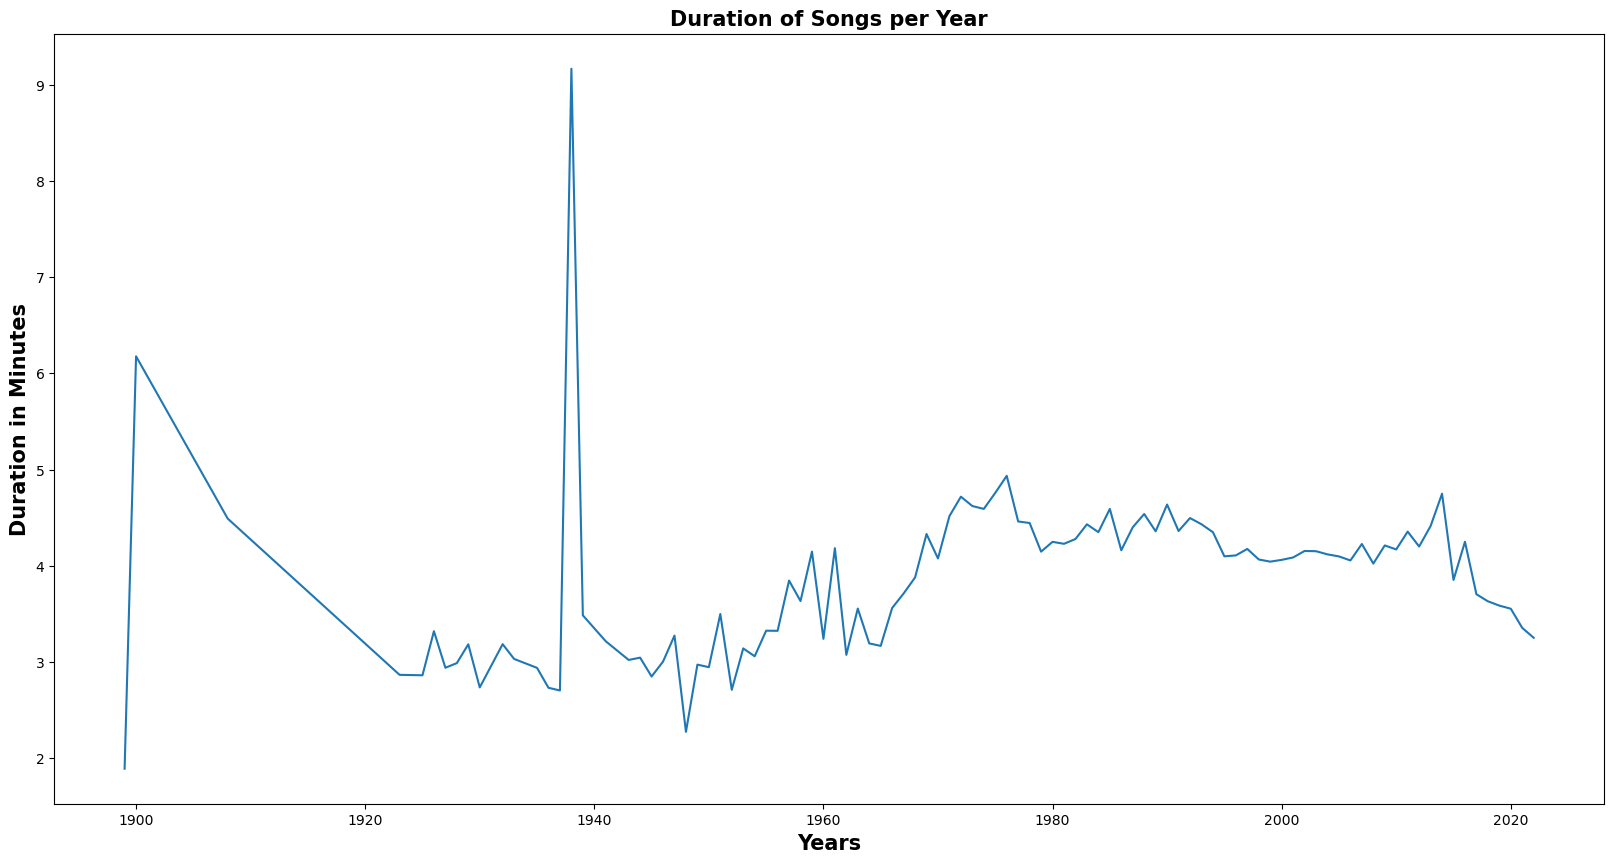

In [73]:
# Average duration of tracks per year
spotify_year_df['duration']['mean'].plot(figsize=(20,10))
plt.title('Duration of Songs per Year', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Years', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Duration in Minutes', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()
plt.show()

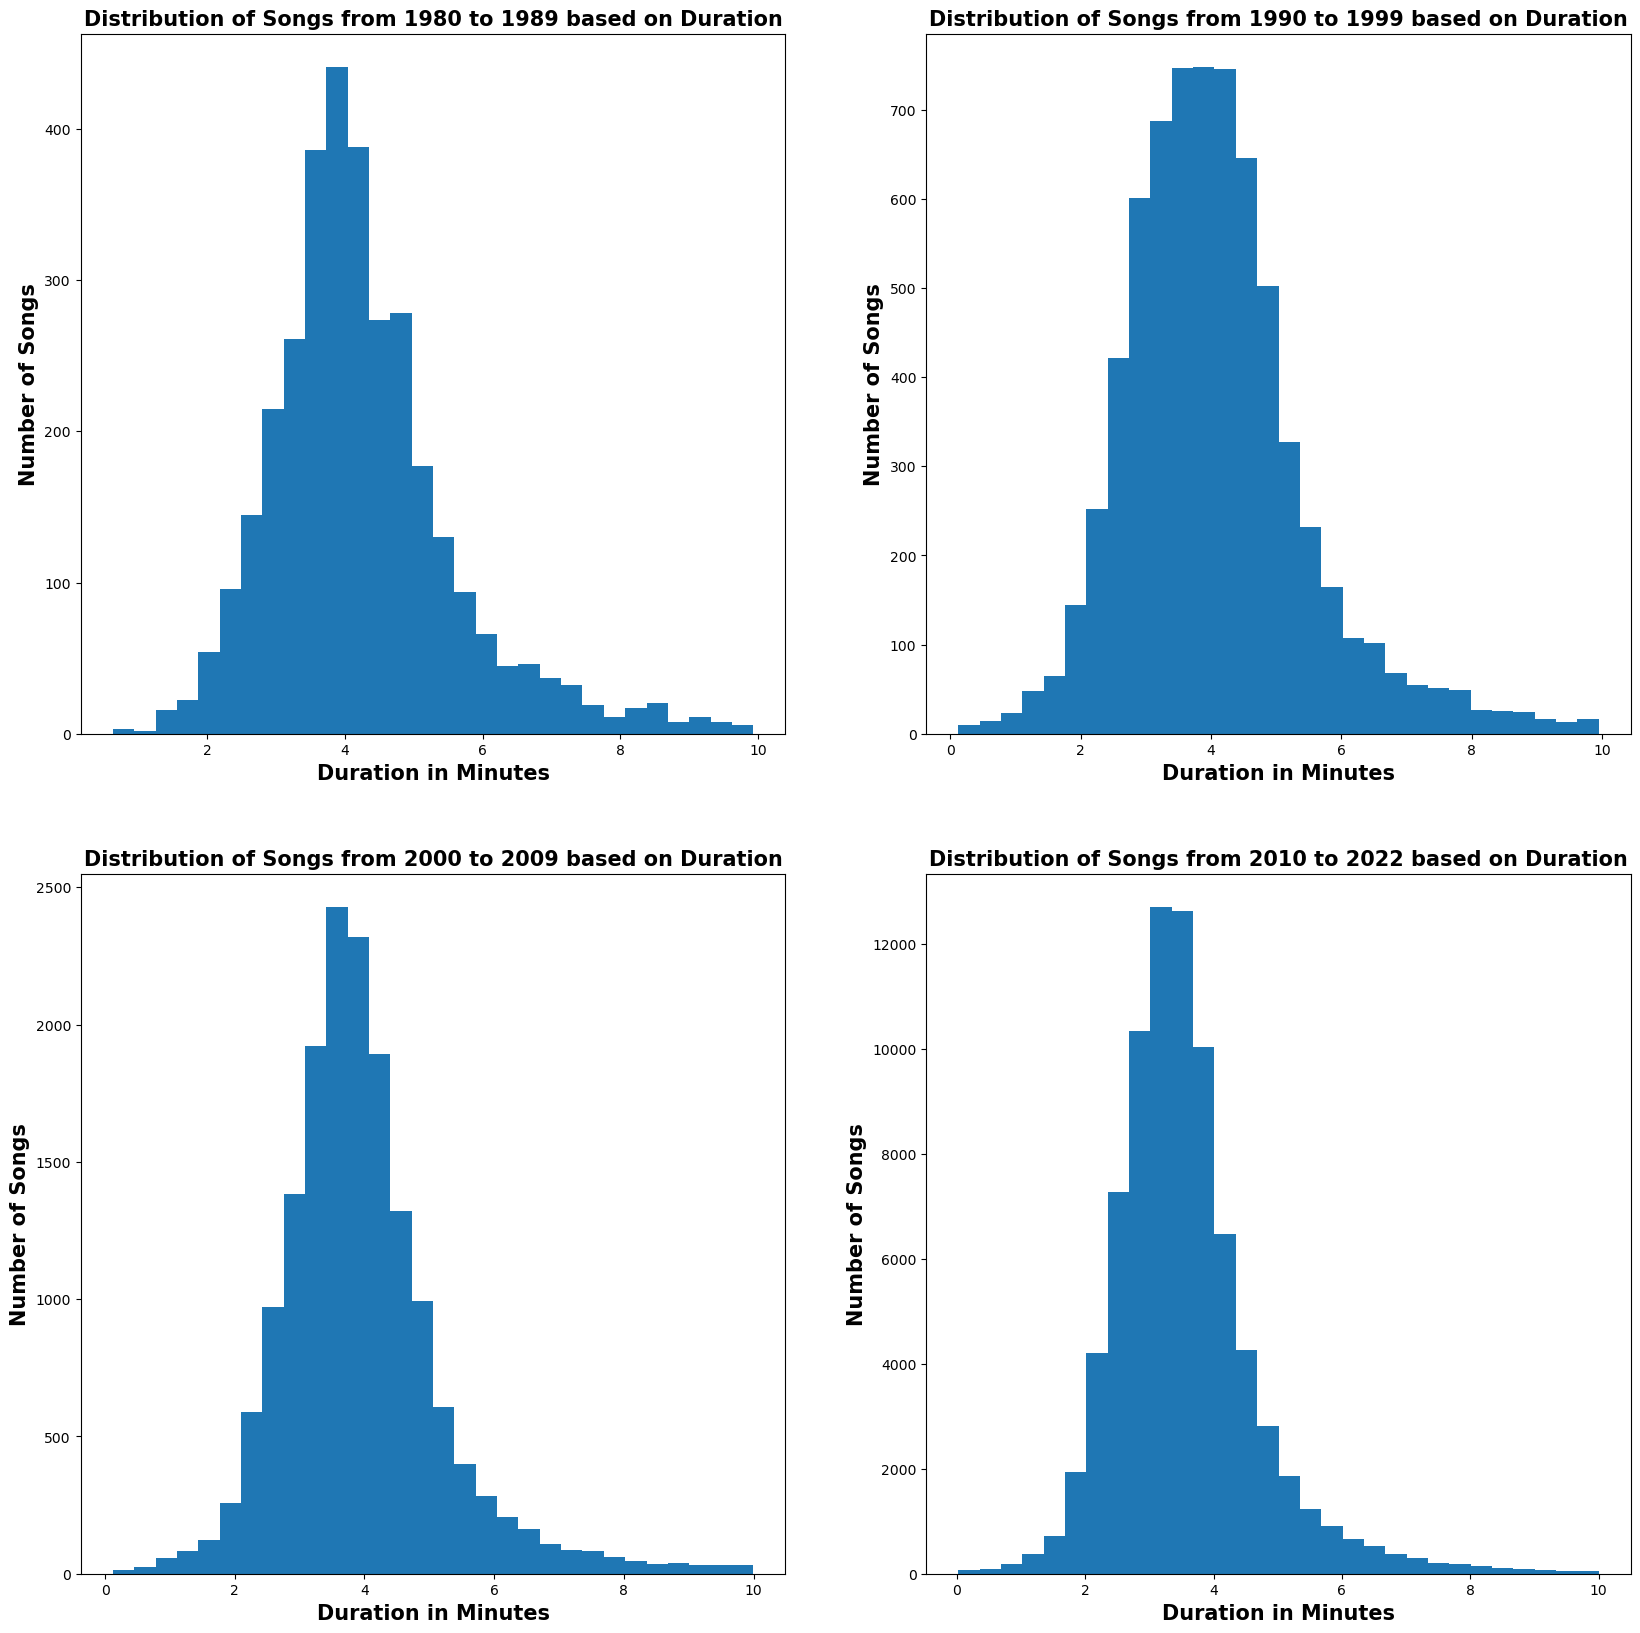

In [74]:
# Distribution of songs based on duration

#Separate 
prev_years = [1980, 1990, 2000, 2010]
end_years = [1989, 1999, 2009, 2022]
lower_duration = 0
upper_duration = 10
duration_limit = (spotify_clean_df['duration'] >= lower_duration) & (spotify_clean_df['duration'] <= upper_duration) 

fig = plt.figure(figsize=(20,20))

for i in range(len(prev_years)):
    
    ax = fig.add_subplot(2, 2, i+1)
    spotify_yrRange_df = spotify_clean_df.loc[duration_limit & (spotify_clean_df['release_year'] >= prev_years[i]) & (spotify_clean_df['release_year'] <= end_years[i])]
    ax.hist(spotify_yrRange_df['duration'], bins = 30)
    plt.title('Distribution of Songs from ' + str(prev_years[i]) + ' to ' + str(end_years[i]) + ' based on Duration', fontdict=dict(fontsize=15), fontweight='bold')
    plt.xlabel('Duration in Minutes', fontdict=dict(fontsize=15), fontweight='bold')
    plt.ylabel('Number of Songs', fontdict=dict(fontsize=15), fontweight='bold')

plt.show()

distribution of the songs are not normally distributed but rather skewed to the right

In [75]:
# Some tracks are more than an hour long
outlier = spotify_clean_df[(spotify_clean_df['duration'] >= 260) & (spotify_clean_df['release_year'] == 2016)]
outlier

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
10843,The Rise and Fall of Bossanova Section IV,P C III,The Rise and Fall of Bossanova (A 13:23:32 Song),2016-11-01,260.9000,0.2500,spotify:track:0q5lnUuDhlogtYCOubNQhQ,0.2160,0.0477,1,0.5826,1,0.0539,0.9327,0.8500,0.1760,0.0199,0.3560,4,2016


In [76]:
data1 = spotify_top100_df[relevant_qualities[0]]
data2 = spotify_out100_df[relevant_qualities[0]]
data1.rename('Top 100', inplace=True)
data2.rename('Remaining', inplace=True)
final_df = pd.concat([data1, data2], axis=1)
final_df

,Top 100,Remaining
21104,0.4057,0.4057
21118,0.6359,0.4473
21092,0.6369,0.6633
21085,0.5974,0.5264
21097,0.6237,0.6602
...,...,...
113942,NaN,0.5416
113943,NaN,0.6410
113944,NaN,0.5872
113945,NaN,0.6197


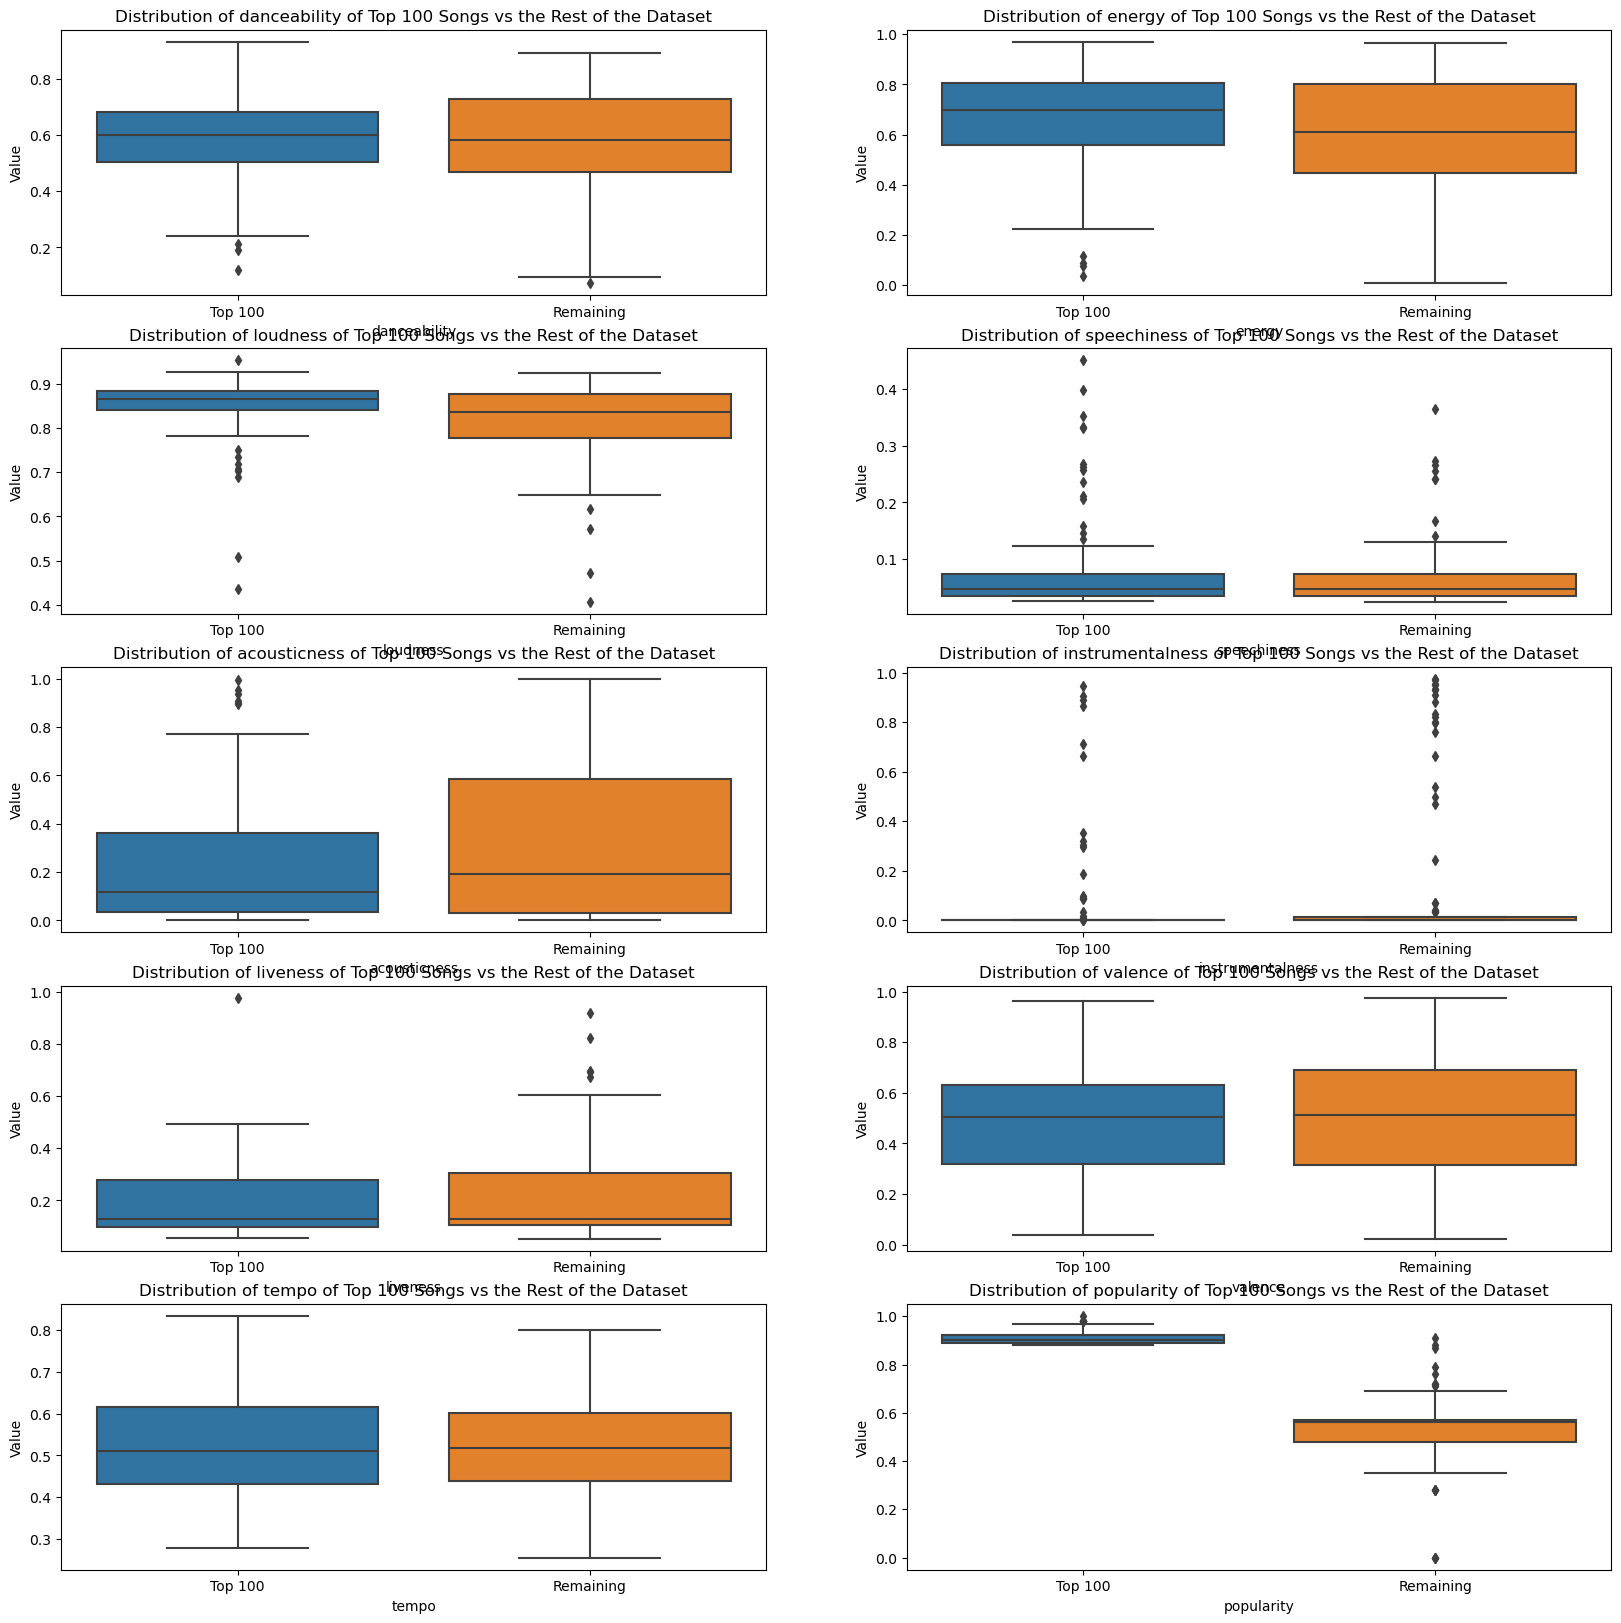

In [77]:
# Compare each audio feature of the top 100 songs with the rest of the dataset (box plots)
fig = plt.figure(figsize=(20,20))

for i in range(len(relevant_qualities)):
    ax = fig.add_subplot(5, 2, i+1)
    
    data1 = spotify_top100_df[relevant_qualities[i]]
    data2 = spotify_out100_df[relevant_qualities[i]]
    data1.rename('Top 100', inplace=True)
    data2.rename('Remaining', inplace=True)
    final_df = pd.concat([data1, data2], axis=1)
                              
    sns.boxplot(data=final_df.dropna())
    plt.title('Distribution of '+relevant_qualities[i]+' of Top 100 Songs vs the Rest of the Dataset')
    plt.xlabel(relevant_qualities[i])
    plt.ylabel('Value')
plt.show()

## Research Questions

We aim to answer the following questions:

* **Main Problem**
1. Would the clusters formed from the dataset provide recommendations relevant to the user? -> change? idk seems wrong pero pa check nlng please thanks 

[kindly add the importance and significance of the research questions]

Additionally, we also want to ask:

* **Sub-problems**
1. What are the qualities of the clusters that might arise based on the songs' audio features?

Knowing the general description of the clusters formed (based on the similarities in their audio features) is essential in creating our recommendation system. 

As much as possible, we would want to recommend songs that are similar to the user's own music preferences.

And we can do that by matching their top played songs—assuming this represents their preferences—to the cluster that those top played songs might belong to.


## Data Mining: Recommendation System

This project falls into the reccomendation system data mining method as it wants to determine what song should we reccomend the user. This system would use of cosine similarity and content-based method. 

### Preparing actual user data 
Before we proceed with recommending songs we have to first establish our reference users whom we will provide song recommendations to. 

We will be recommending songs to three reference users. 

The users that will be featured here are actual people. Their data was extracted from their Spotify accounts using the API + Spotipy library as well.

#### Loading user dataset

In [78]:
#  reading user data into pandas DataFrame
user_1_tracks = pd.read_json("data\\users\\aexylian_tracks.json")
user_1_tracks_feat = pd.read_json("data\\users\\aexylian_features.json")

user_2_tracks = pd.read_json("data\\users\\jmhgqk29p607xydvfclivake4_tracks.json")
user_2_tracks_feat = pd.read_json("data\\users\\jmhgqk29p607xydvfclivake4_features.json")

user_3_tracks = pd.read_json("data\\users\\227whclz22iewgm7htfoxxfoa_tracks.json")
user_3_tracks_feat = pd.read_json("data\\users\\227whclz22iewgm7htfoxxfoa_features.json")

#  joining the two datasets with SQL inner join-like mechanism 
user_1_df = user_1_tracks.join(user_1_tracks_feat, how="inner",rsuffix="_duplicate")
user_2_df = user_2_tracks.join(user_2_tracks_feat, how="inner",rsuffix="_duplicate")
user_3_df = user_3_tracks.join(user_3_tracks_feat, how="inner",rsuffix="_duplicate")


#  dropping the duplicated key column 
user_1_df = user_1_df.drop(columns="uri_duplicate")
user_2_df = user_2_df.drop(columns="uri_duplicate")
user_3_df = user_3_df.drop(columns="uri_duplicate")

print("\nUser1")
display(user_1_df.head())
print("\nUser2")
display(user_2_df.head())
print("\nUser3")
display(user_3_df.head())


User1


,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,All Alone,Acid Ghost,All Alone,2015-01-30,168648,51,spotify:track:72xnRXxHiAhTfKSzlPdEmo,0.5090,0.5880,0,-9.5420,1,0.0298,0.6930,0.8450,0.1150,0.4870,171.8450,4
1,From Eden,Hozier,Hozier (Special Edition),2014-11-06,283466,43,spotify:track:5ltHoAqXvRiOQvcAqpHo3U,0.3950,0.6760,0,-5.4600,1,0.0498,0.6080,0.0000,0.1170,0.3150,142.9290,5
2,Cherry Wine - Live,Hozier,Hozier (Special Edition),2014-11-06,240147,46,spotify:track:1FWFmQZwvNctmy8kT5ESw1,0.4180,0.1110,1,-14.8480,1,0.0389,0.9530,0.0034,0.0982,0.2280,82.5080,4
3,In A Week,Hozier,Hozier (Special Edition),2014-11-06,318493,38,spotify:track:3FmGVePfqBiM5XESN35ZHK,0.4810,0.2600,0,-12.2410,1,0.0307,0.7940,0.0000,0.1420,0.1690,131.3190,3
4,Falling,Harry Styles,Fine Line,2019-12-13,240133,84,spotify:track:1ZMiCix7XSAbfAJlEZWMCp,0.5670,0.2670,4,-6.5020,1,0.0299,0.8390,0.0000,0.0890,0.0592,110.0110,4



User2


,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Repeat,Al James,Repeat,2020-01-24,230000,69,spotify:track:011GTFfE8rqTRMhz5g8IAW,0.6570,0.8800,10,-3.6720,0,0.1020,0.1210,0.0000,0.4630,0.7690,150.0840,4
1,Tahanan,Adie,Tahanan,2021-12-08,293727,74,spotify:track:5CUQnKjA6nlteCnxMKsjIu,0.7020,0.6920,10,-5.4050,1,0.0539,0.0542,0.0000,0.0877,0.4190,144.8960,4
2,Mahika,Adie,Mahika,2022-05-11,201951,80,spotify:track:47sq83n5WN22ZzYnGn8aTy,0.5090,0.5740,5,-6.0350,0,0.2620,0.5330,0.0000,0.0898,0.6900,85.9600,4
3,Panaginip,Joaquin Pacete,Panaginip,2021-08-24,281496,4,spotify:track:1xmDy73FhJm5nwppJfY8oJ,0.7090,0.8800,2,-2.7340,1,0.0585,0.0298,0.0000,0.1030,0.7130,119.9480,4
4,PSG,Al James,PSG,2022-01-13,180000,69,spotify:track:0xaKCWpX4CBSqwh7CQa4EG,0.6950,0.7620,0,-3.4970,1,0.0395,0.1920,0.0024,0.0863,0.5530,120.0420,4



User3


,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Butter,BTS,Butter,2021-05-21,164441,1,spotify:track:3VqeTFIvhxu3DIe4eZVzGq,0.7590,0.4590,8,-5.1870,1,0.0948,0.0032,0.0000,0.0906,0.6950,109.9970,4
1,Butter,BTS,"Butter (Hotter, Sweeter, Cooler)",2021-06-04,164441,9,spotify:track:2bgTY4UwhfBYhGT4HUYStN,0.7590,0.4590,8,-5.1870,1,0.0948,0.0032,0.0000,0.0906,0.6950,109.9970,4
2,Life Goes On,BTS,BE,2020-11-20,207481,5,spotify:track:249gnXrbfmV8NG6jTEMSwD,0.5660,0.7160,1,-5.7330,1,0.0424,0.0069,0.0000,0.3700,0.4500,81.0680,4
3,Permission to Dance,BTS,Butter / Permission to Dance,2021-07-09,187585,6,spotify:track:0LThjFY2iTtNdd4wviwVV2,0.7020,0.7410,9,-5.3300,1,0.0427,0.0054,0.0000,0.3370,0.6460,124.9250,4
4,Obvious,CHPTRS,Chapter Three,2018-05-29,295367,41,spotify:track:4XfApF1jJqLN1R7cPC0wZy,0.3410,0.3840,2,-9.2850,1,0.0302,0.5120,0.2440,0.0957,0.1240,135.9190,4


#### Scaling numeric features

In [79]:
#  initializing scaled user dataframes
user_1_scaled_df = user_1_df.copy()
user_2_scaled_df = user_2_df.copy()
user_3_scaled_df = user_3_df.copy()

#  scaling users' datasets 
user_1_scaled_df.loc[:, to_scale] = scaler.fit_transform(user_1_scaled_df.loc[:, to_scale])
user_2_scaled_df.loc[:, to_scale] = scaler.fit_transform(user_2_scaled_df.loc[:, to_scale])
user_3_scaled_df.loc[:, to_scale] = scaler.fit_transform(user_3_scaled_df.loc[:, to_scale])

#  display scaled dataframe's summary statistics 
display(user_1_scaled_df.loc[:, to_scale].describe().T)
display(user_2_scaled_df.loc[:, to_scale].describe().T)
display(user_3_scaled_df.loc[:, to_scale].describe().T)

,count,mean,std,min,25%,50%,75%,max
danceability,50.0000,0.5280,0.2460,0.0000,0.3609,0.5102,0.6917,1.0000
energy,50.0000,0.4940,0.2639,0.0000,0.3011,0.4875,0.6917,1.0000
loudness,50.0000,0.6039,0.2761,0.0000,0.4651,0.6644,0.8270,1.0000
speechiness,50.0000,0.1136,0.1965,0.0000,0.0152,0.0395,0.1066,1.0000
acousticness,50.0000,0.3972,0.3590,0.0000,0.0283,0.3595,0.7448,1.0000
instrumentalness,50.0000,0.1319,0.2852,0.0000,0.0000,0.0002,0.0168,1.0000
liveness,50.0000,0.1776,0.2507,0.0000,0.0591,0.0745,0.1885,1.0000
valence,50.0000,0.3227,0.2628,0.0000,0.1154,0.2421,0.4847,1.0000
tempo,50.0000,0.4528,0.2852,0.0000,0.2261,0.4391,0.6490,1.0000
popularity,50.0000,0.6671,0.1909,0.0000,0.5476,0.6845,0.7738,1.0000


,count,mean,std,min,25%,50%,75%,max
danceability,50.0000,0.5997,0.1926,0.0000,0.5283,0.6254,0.6962,1.0000
energy,50.0000,0.6779,0.2533,0.0000,0.5146,0.7820,0.8672,1.0000
loudness,50.0000,0.7190,0.2051,0.0000,0.6269,0.7821,0.8432,1.0000
speechiness,50.0000,0.1834,0.2307,0.0000,0.0605,0.1057,0.1783,1.0000
acousticness,50.0000,0.2297,0.2769,0.0000,0.0374,0.1396,0.2453,1.0000
instrumentalness,50.0000,0.0532,0.1841,0.0000,0.0000,0.0000,0.0009,1.0000
liveness,50.0000,0.1691,0.2272,0.0000,0.0442,0.0634,0.2132,1.0000
valence,50.0000,0.5230,0.2394,0.0000,0.3671,0.5484,0.7161,1.0000
tempo,50.0000,0.4116,0.2254,0.0000,0.2486,0.4311,0.5553,1.0000
popularity,50.0000,0.7268,0.2467,0.0000,0.6867,0.8038,0.8861,1.0000


,count,mean,std,min,25%,50%,75%,max
danceability,50.0000,0.5806,0.2123,0.0000,0.4896,0.5784,0.7537,1.0000
energy,50.0000,0.6859,0.2066,0.0000,0.5653,0.7345,0.8384,1.0000
loudness,50.0000,0.8686,0.1418,0.0000,0.8487,0.9022,0.9261,1.0000
speechiness,50.0000,0.1969,0.2172,0.0000,0.0536,0.1042,0.3068,1.0000
acousticness,50.0000,0.1818,0.2449,0.0000,0.0107,0.0908,0.2787,1.0000
instrumentalness,50.0000,0.0512,0.1925,0.0000,0.0000,0.0000,0.0000,1.0000
liveness,50.0000,0.3127,0.2276,0.0000,0.1643,0.2684,0.3866,1.0000
valence,50.0000,0.5254,0.2632,0.0000,0.3307,0.5269,0.7628,1.0000
tempo,50.0000,0.4661,0.2601,0.0000,0.2912,0.4341,0.6542,1.0000
popularity,50.0000,0.4029,0.3835,0.0000,0.0140,0.3876,0.7528,1.0000


#### Find the average qualities of the sample user's top 50 tracks

In [80]:
#  initializing dataframe for user dataframe with only relevant qualities
user1_num_df = user_1_scaled_df.copy()
user2_num_df = user_2_scaled_df.copy()
user3_num_df = user_3_scaled_df.copy()

#  specifying features to retain
user1_num_df = user1_num_df[relevant_qualities]
user2_num_df = user2_num_df[relevant_qualities]
user3_num_df = user3_num_df[relevant_qualities]

#  getting the average of these features 
ave_user1_pref = user1_num_df.mean()
ave_user2_pref = user2_num_df.mean()
ave_user3_pref = user3_num_df.mean()

#  giving each pd.series a specific name
ave_user1_pref = ave_user1_pref.rename("user1") 
ave_user2_pref = ave_user2_pref.rename("user2") 
ave_user3_pref = ave_user3_pref.rename("user3") 

#  making a dataframe for average user preference
ave_users_pref = pd.DataFrame([ave_user1_pref, ave_user2_pref, ave_user3_pref])

In [81]:
#  initialize PCA for users to reduce components to 7 
#  this number is consistent with number of features in cluster_df later 
pca_user = PCA(n_components=7)

#  applying pca on each dataset 
pca_user1 = pca_user.fit_transform(user1_num_df) 
pca_user2 = pca_user.fit_transform(user2_num_df) 
pca_user3 = pca_user.fit_transform(user3_num_df) 

#  initializing dataframe for each user dataframe that were reduced
pca_user1_df = pd.DataFrame(pca_user1, index=user1_num_df.index)
pca_user2_df = pd.DataFrame(pca_user2, index=user2_num_df.index)
pca_user3_df = pd.DataFrame(pca_user3, index=user3_num_df.index)

#  getting the mean of the features
pca_user1_mean = np.array(pca_user1_df.mean()).reshape(1,-1)
pca_user2_mean = np.array(pca_user2_df.mean()).reshape(1,-1)
pca_user3_mean = np.array(pca_user3_df.mean()).reshape(1,-1)

In [82]:
fig = go.Figure()

for i in range(len(ave_users_pref)):
    fig.add_trace(go.Scatterpolar(
            r = ave_users_pref.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = ave_users_pref.index[i],
        ))
    
fig.update_layout(
    title = 'Average Factors of Users',
    showlegend = True
)

fig.show()

We can see from the polar chart that the average qualities of the users' top songs are more or less the same. 

It is possible that these users all belong to the same clusters then. 

But we shall see.

<h4> Assumption Checking </h4>

In [83]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")  

In [84]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [89]:
#Checking for normality
check_normality(spotify_clean_df["danceability"])
check_normality(spotify_clean_df["energy"])
check_normality(spotify_clean_df["loudness"])
check_normality(spotify_clean_df["speechiness"])
check_normality(spotify_clean_df["acousticness"])
check_normality(spotify_clean_df["instrumentalness"])
check_normality(spotify_clean_df["liveness"])
check_normality(spotify_clean_df["valence"])
check_normality(spotify_clean_df["tempo"])
check_normality(spotify_clean_df["popularity"])

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


### Clustering the songs with K-means
Now that we have prepared our users' data, we will now proceed to clustering our song dataset into their respective clusters.

But we first have to most optimal numbers of clusters for our dataset.

#### Preparing dataframe 

In [153]:
#  initializing a cluster dataframe
cluster_df = spotify_clean_df.copy()

#  URI as index
cluster_df = cluster_df.set_index("uri")

#  removing unneccesary features from the cluster dataframe
cluster_df = cluster_df[relevant_qualities]

#### Reducing dimensionality

In [154]:
pca_main = PCA(n_components=0.95)
pca = pca_main.fit_transform(cluster_df) 
pca_cluster_df = pd.DataFrame(pca, index=cluster_df.index)
print(f"Reduced our dataset's features from {cluster_df.shape[1]} to {pca_cluster_df.shape[1]}")

Reduced our dataset's features from 10 to 7


#### Determining the *k* or the most optimal number of clusters
We will be using three evaluation methods to get the right k for the job. 

These methods are as follows:
- Elbow method
- Silhoutte coefficient 
- Davies-Bouldin score

In [66]:
#  initialize k array
k_list = [k for k in range(2,11)]

#  initialize WCSS/inertia array
inertia_list = []

#  initialize silhouette coefficient array
silhouette_list = []

#  initialize davies-bouldin score array
db_list = []

#  running a for loop to determine best value for k
for k in k_list:
    #  running kmeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=10).fit(pca_cluster_df)
    clusters = kmeans.labels_
    
    #  diagnostic indicators 
    #  for elbow method
    inertia = kmeans.inertia_
    inertia_list.append(inertia)
    
    #  for silhouette coeffiicent
    silhouette_coef = silhouette_score(pca_cluster_df, clusters)
    silhouette_list.append(silhouette_coef)
    
    #  for davies-bouldin score
    db_score = davies_bouldin_score(pca_cluster_df, clusters)
    db_list.append(db_score)

2 [1 1 1 ... 0 0 0]
3 [2 0 0 ... 1 1 1]
4 [3 2 2 ... 1 1 1]
5 [4 3 3 ... 0 2 2]
6 [0 1 1 ... 2 5 5]
7 [5 1 1 ... 6 0 0]
8 [2 0 0 ... 3 5 5]
9 [1 6 6 ... 7 4 4]
10 [5 3 3 ... 6 1 1]


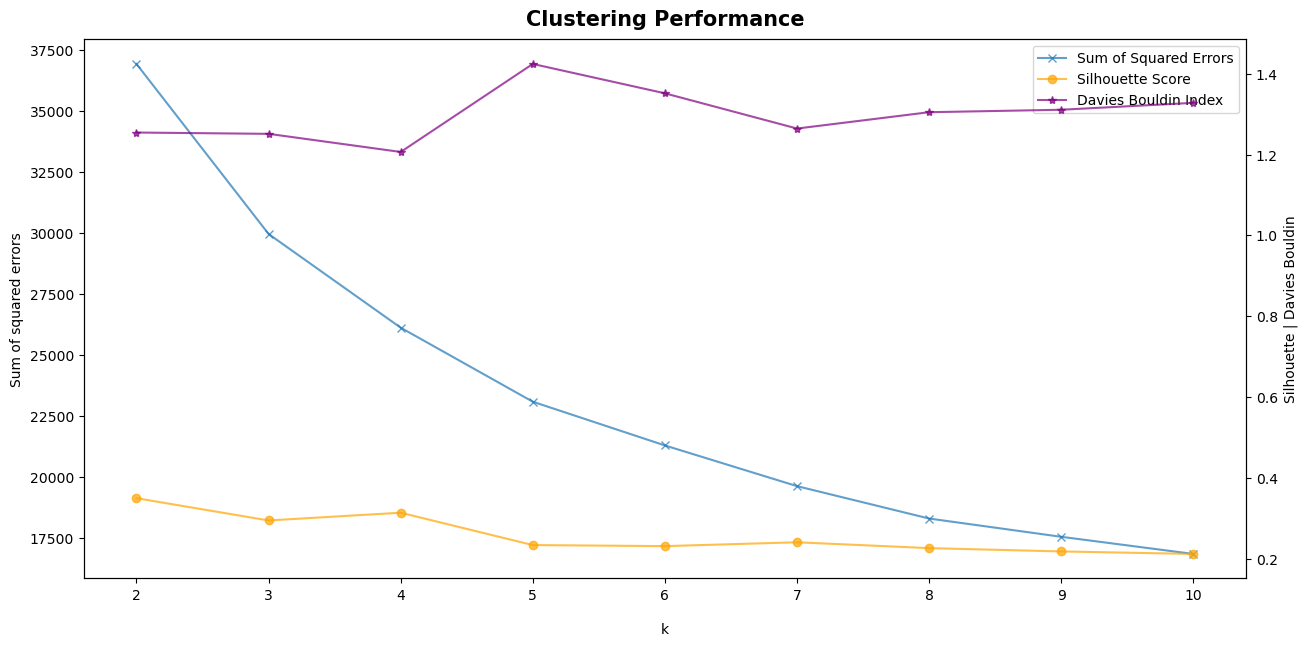

In [67]:
alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(15, 7), dpi=100)
lns1 = ax.plot(k_list, inertia_list, 'x-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')
# plt.title('Elbow Method For Optimal k')
# ax.legend(loc=1)

ax2 = ax.twinx()
ax2.set_ylabel('Silhouette | Davies Bouldin')
ax2.grid(False)
lns2 = ax2.plot(k_list, silhouette_list, 'o-', color='orange', alpha=alpha, label='Silhouette Score')
lns3 = ax2.plot(k_list, db_list, '*-', color='purple', alpha=alpha, label='Davies Bouldin Index')
# lns4 = ax2.plot(k_list, chi, '*-', color='purple', label='Calinski Harabasz Index')

lns = lns1+lns2+lns3
# lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.set_xlabel("k", fontsize=10, labelpad=15)
plt.title('Clustering Performance',
          fontdict={"fontsize": 15,
                    "fontweight": "bold"},
          pad=10)
plt.show()

The elbow method is inconclusive. 

The k with the highest silhouette score is 2. Having only 2 clusters is insufficient for our purpose. 
<br>We are more partial to the k with the second highest silhoette score, which is 4. 

The Davies-Bouldin test backs up our choice since this test favors k as 4 since it scored the lowest DB index.

#### Clustering the dataset into 4 clusters

In [68]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(pca_cluster_df)
cluster_df["cluster"] = kmeans.labels_
cluster_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,cluster
uri,,,,,,,,,,,
spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.316430,0.399,0.824630,0.033161,0.472892,0.583000,0.130,0.144144,0.524695,0.57,3
spotify:track:1kNVRCfLtotmIKQOb87tUL,0.852941,0.367,0.847386,0.065599,0.872490,0.003400,0.114,0.184184,0.458168,0.48,2
spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.444219,0.156,0.683626,0.031198,0.886546,0.268000,0.105,0.222222,0.355323,0.44,2
spotify:track:3UG4sW8T05V7raSbLA67o8,0.630832,0.730,0.837313,0.038017,0.018574,0.000426,0.105,0.538539,0.487270,0.34,1
spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.422921,0.123,0.695460,0.038946,0.996988,0.012500,0.143,0.180180,0.572237,0.53,2


(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25]),
 [Text(0, -1.0, '−1.00'),
  Text(0, -0.75, '−0.75'),
  Text(0, -0.5, '−0.50'),
  Text(0, -0.25, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25')])

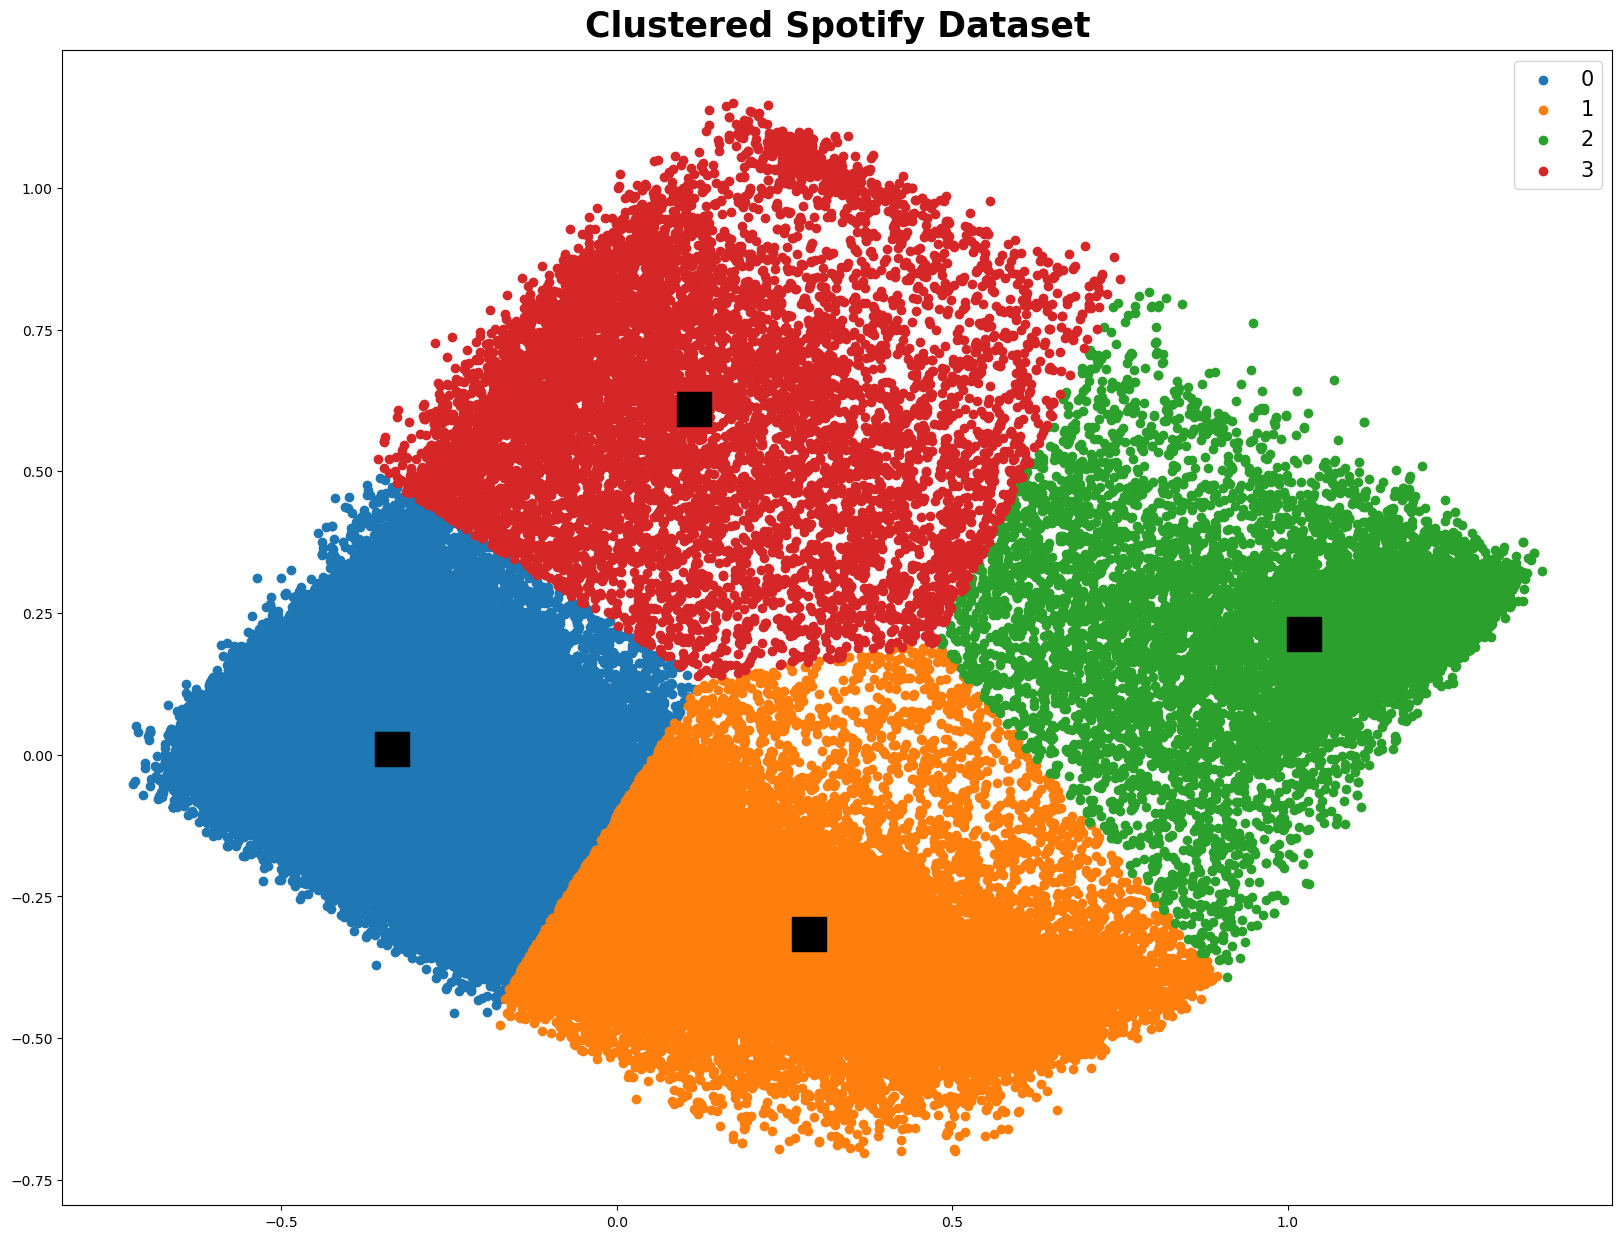

In [69]:
#  reducing features into 2 since we will only visualize with 2 axes 
pca_viz = PCA(n_components=2)
cluster_viz = pca_viz.fit_transform(cluster_df.iloc[:,:-1]) 

#  applying kmeans to the newly reduced dataframe for visualization 
#  will also use 4 clusters too
kmeans_viz = KMeans(n_clusters=4, random_state=10).fit(cluster_viz)
label = kmeans_viz.labels_

centroids = kmeans_viz.cluster_centers_
u_labels = np.unique(label)

#  visualizing clusters
fig = plt.figure(figsize=(20,15))
for i in u_labels:
    plt.scatter(cluster_viz[label == i , 0] , cluster_viz[label == i , 1] , label = i)
plt.scatter(centroids[:,0], 
            centroids[:,1],
            s = 600, 
            color = 'black',
            marker=",")
plt.legend(fontsize=15)
plt.title("Clustered Spotify Dataset",
          fontdict={"fontsize": 25,
                    "fontweight": "bold"},
          pad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#### Identifying the qualities of each cluster

In [70]:
#  initializing dataframe of clusters and their songs' average qualities 
cluster_song_qualities = cluster_df.groupby(by="cluster")[relevant_qualities].mean()

In [71]:
fig = go.Figure()

for i in range(len(cluster_song_qualities)):
    fig.add_trace(go.Scatterpolar(
            r = cluster_song_qualities.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = cluster_song_qualities.index[i].astype(str)
        ))
    
fig.update_layout(
    title = 'Average Factors of Each Cluster',
    showlegend = True,
    width=800, 
    height=400
)

fig.show()

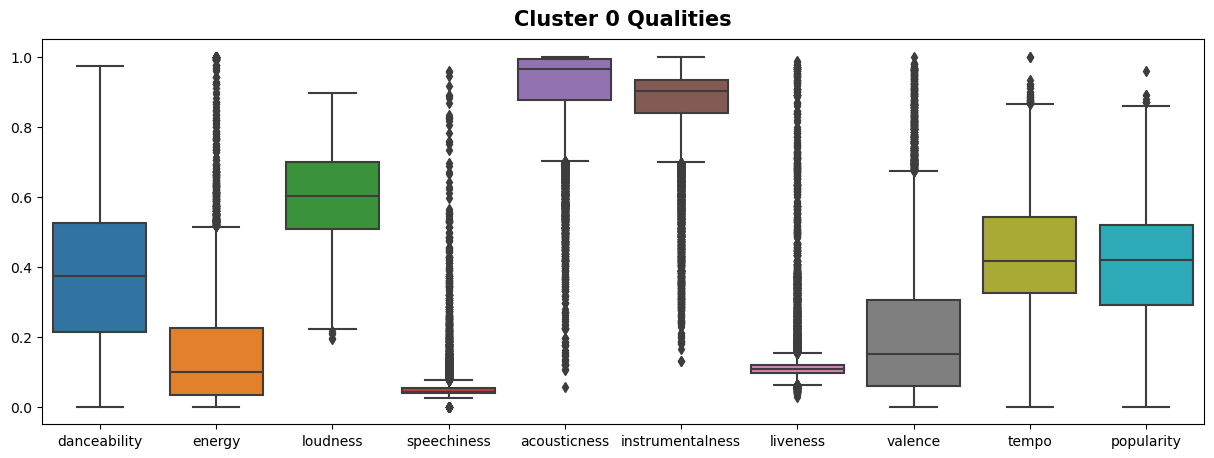

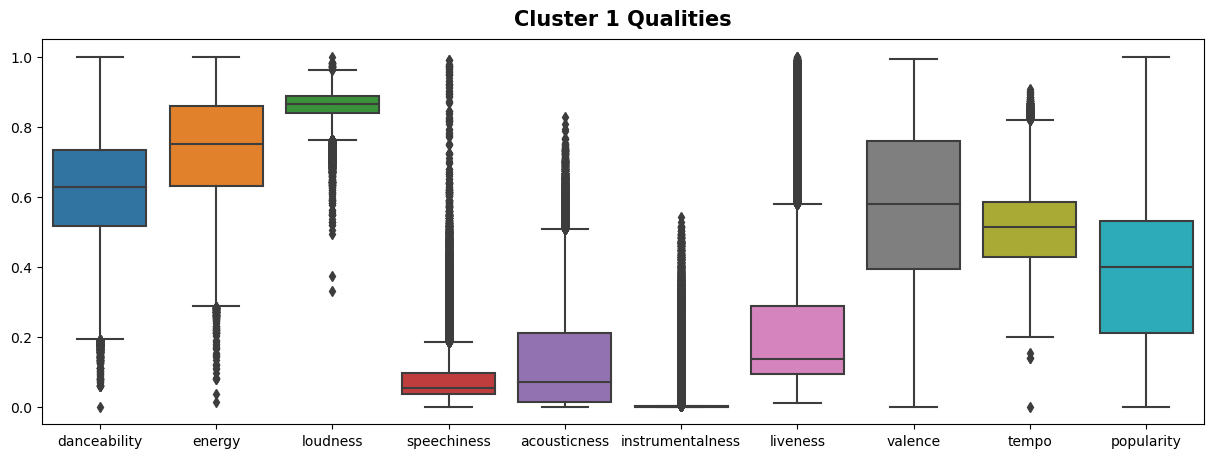

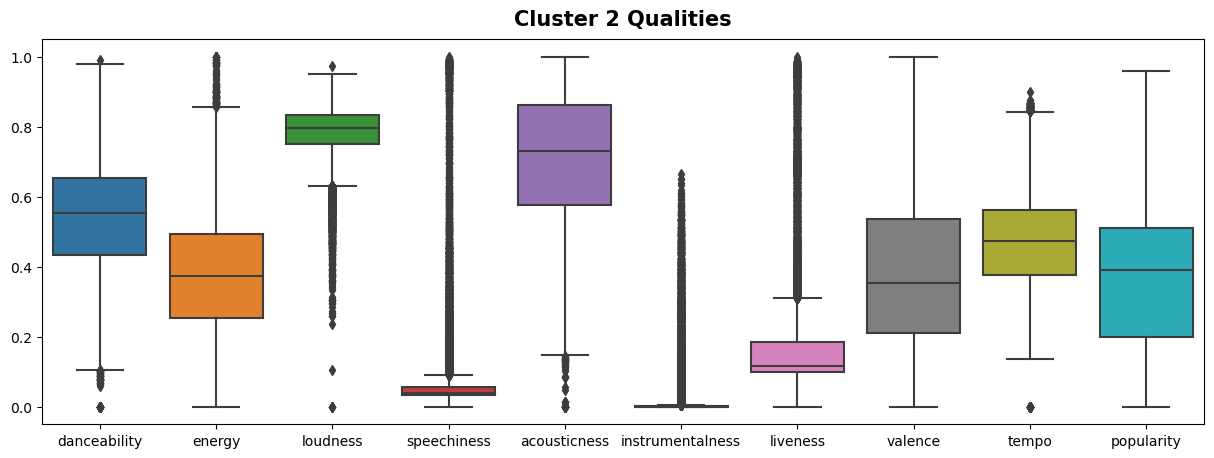

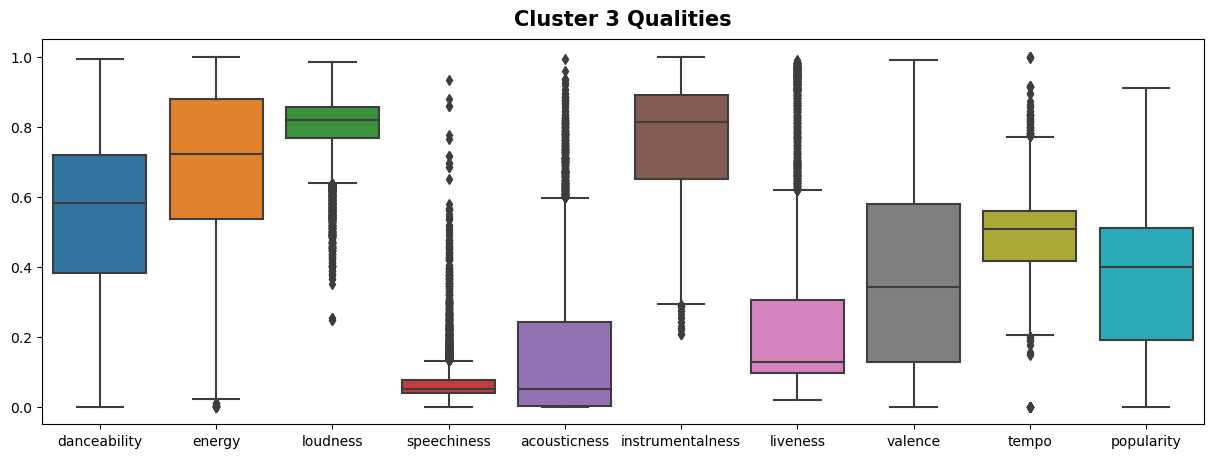

In [72]:
for cluster_num in cluster_song_qualities.index:
    fig = plt.figure(figsize=(15,5))
    ax = sns.boxplot(cluster_df.query(f"cluster == {cluster_num}").iloc[:, :-1])
    plt.title(f"Cluster {cluster_num} Qualities",
              fontdict={"fontsize": 15,
                        "fontweight": "bold"},
              pad=10)

The cluster labels vary from one iteration to another. 
<br>Nevertheless, we will describe the general characteristics 
<br>of the clusters that arise from the dataset. 

Cluster A:
- non-acoustic
- instrumental
- somewhat danceable
- high energy
- loud songs

Cluster B:
- acoustic
- non-instrumental
- somewhat danceable
- low energy
- loud songs

Cluster C:
- acoustic
- instrumental
- somewhat danceable
- low energy
- mellow songs

Cluster D (mainstream):
- non-acoustic
- non-instrumental
- danceable
- high energy
- loud songs

Most songs in the clusters are recorded in a studio (according to liveness), are normally paced (tempo), and have negative vibes associated with it (valence). 

### Recommending most similar songs with cosine similarity

#### Examining user data 

In [73]:
user1_label = kmeans.predict(pca_user1_mean)[0]
user2_label = kmeans.predict(pca_user2_mean)[0]
user3_label = kmeans.predict(pca_user3_mean)[0]

print(f"User 1 = Cluster {user1_label}\nUser 2 = Cluster {user2_label}\nUser 3 = Cluster {user3_label}")

User 1 = Cluster 1
User 2 = Cluster 1
User 3 = Cluster 1


All the users we have belong to the same cluster. 

In [74]:
#  initializing dataframe of users and their preferred songs' average qualities 
ave_pref_users_df = pd.DataFrame([ave_user1_pref, ave_user2_pref,ave_user3_pref])

#  stacking these two datasets together 
users_clusters = cluster_song_qualities.loc[user1_label].to_frame().T.append(ave_pref_users_df)
users_clusters



fig = go.Figure()

for i in range(len(users_clusters)):
    fig.add_trace(go.Scatterpolar(
            r = users_clusters.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = users_clusters.index[i]
        ))
    
fig.update_layout(
    title = 'Average Factors of Each Cluster',
    showlegend = True,
    width=800, 
    height=400
)

fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24172\602246164.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### Recommending songs to User 1

In [79]:
relevant_columns = ['song_title',
                    'artist_name',
                    'danceability',
                    'energy',
                    'loudness',
                    'speechiness',
                    'acousticness',
                    'instrumentalness',
                    'liveness',
                    'valence',
                    'tempo',
                    'popularity']

In [80]:
user1_mean = np.array(ave_user1_pref).reshape(1,-1)
sanscluster1_df = cluster_df.query(f"cluster == {user1_label}")
sanscluster1_df = sanscluster1_df.iloc[:, :-1]

user1_recommendations = cosine_similarity(sanscluster1_df, user1_mean).reshape(sanscluster1_df.shape[0])
user1_recommendations = pd.Series(user1_recommendations, index=sanscluster1_df.index).nlargest(10)

user1_reco_df = spotify_clean_df[spotify_clean_df.uri.isin(user1_recommendations.keys().tolist())][relevant_columns]
user1_reco_df["cosine_similarity"] = user1_recommendations.values  
user1_reco_df = user1_reco_df.set_index('song_title')
display(user1_reco_df.iloc[:, [0, 10]] )

,artist_name,popularity
song_title,,
Gimme Shelter,The Rolling Stones,0.77
Jimmy Cooks (feat. 21 Savage),Drake,0.91
(Don't Fear) The Reaper,Blue Öyster Cult,0.76
Oklahoma Smokeshow,Zach Bryan,0.77
telepatía,Kali Uchis,0.83
OK Not To Be OK,Marshmello,0.76
Dark Red,Steve Lacy,0.90
FEAR.,Kendrick Lamar,0.67
Primeiro Beck Ela Me Mamou,Mc Kitinho,0.78


In [81]:
user1_reco_viz = user1_reco_df[relevant_qualities]
user1_reco_viz = user1_reco_viz.append(ave_user1_pref)

fig = go.Figure()

for i in range(len(user1_reco_viz)):
    fig.add_trace(go.Scatterpolar(
            r = user1_reco_viz.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = user1_reco_viz.index[i]
        ))

fig.update_layout(
    title = 'Average Factors of User 1 Recommended Songs',
    showlegend = True,
    width=800, 
    height=400
)

fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24172\2919888611.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



As we can see from the polar chart, the qualities of the recommended songs are close to user 1's preferred songs' qualities. 

Let us now recommend songs to the other users!

#### Recommending songs to User 2

In [82]:
user2_mean = np.array(ave_user2_pref).reshape(1,-1)
sanscluster2_df = cluster_df.query(f"cluster == {user2_label}")
sanscluster2_df = sanscluster2_df.iloc[:, :-1]

user2_recommendations = cosine_similarity(sanscluster2_df, user2_mean).reshape(sanscluster2_df.shape[0])
user2_recommendations = pd.Series(user2_recommendations, index=sanscluster2_df.index).nlargest(10)

user2_reco_df = spotify_clean_df[spotify_clean_df.uri.isin(user2_recommendations.keys().tolist())][relevant_columns]
user2_reco_df["cosine_similarity"] = user2_recommendations.values  
user2_reco_df = user2_reco_df.set_index('song_title')
user2_reco_df.iloc[:, [0, 10]] 

,artist_name,popularity
song_title,,
Billionaire (feat. Bruno Mars),Travie McCoy,0.74
Cupid's Chokehold / Breakfast in America,Gym Class Heroes,0.77
Paralyzer,Finger Eleven,0.76
Never Sleep (with Lil Baby feat. Travis Scott),NAV,0.80
Thunder,Imagine Dragons,0.85
Purple Hearts,Kendrick Lamar,0.74
Sleazy Flow (with Lil Baby) - Remix,SleazyWorld Go,0.78
when the party's over,Billie Eilish,0.84
Thunderous,Stray Kids,0.76


In [83]:
user2_reco_viz = user2_reco_df[relevant_qualities]
user2_reco_viz = user2_reco_viz.append(ave_user2_pref)

fig = go.Figure()

for i in range(len(user2_reco_viz)):
    fig.add_trace(go.Scatterpolar(
            r = user2_reco_viz.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = user2_reco_viz.index[i]
        ))

fig.update_layout(
    title = 'Average Factors of User 2 Recommended Songs',
    showlegend = True,
    width=800, 
    height=400
)

fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24172\2698148042.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Similar to user 1, songs recommended to user 2 are close to their preferred songs too.

#### Recommending songs to User 3

In [84]:
user3_mean = np.array(ave_user3_pref).reshape(1,-1)
sanscluster3_df = cluster_df.query(f"cluster == {user3_label}")
sanscluster3_df = sanscluster3_df.iloc[:, :-1]

user3_recommendations = cosine_similarity(sanscluster3_df, user3_mean).reshape(sanscluster3_df.shape[0])
user3_recommendations = pd.Series(user3_recommendations, index=sanscluster3_df.index).nlargest(10)

user3_reco_df = spotify_clean_df[spotify_clean_df.uri.isin(user3_recommendations.keys().tolist())][relevant_columns]
user3_reco_df["cosine_similarity"] = user3_recommendations.values  
user3_reco_df = user3_reco_df.set_index('song_title')
user3_reco_df.iloc[:, [0, 10]] 

,artist_name,popularity
song_title,,
If I Didn't Have Your Love,Leonard Cohen,0.44
Paper,ARDN,0.28
I want to be a pillow,J_ust,0.48
One Love,Bob Marley & The Wailers,0.44
"Just Now, Var. III",Anat Fort,0.38
Indigo,Vee Jay,0.46
Stillness,Stephen Wake,0.44
Du kan gå din egen väg,Håkan Hellström,0.46
Cayendo hacia adelante,Adelinda,0.36


In [85]:
user3_reco_viz = user3_reco_df[relevant_qualities]
user3_reco_viz = user3_reco_viz.append(ave_user3_pref)

fig = go.Figure()

for i in range(len(user3_reco_viz)):
    fig.add_trace(go.Scatterpolar(
            r = user3_reco_viz.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = user3_reco_viz.index[i]
        ))

fig.update_layout(
    title = 'Average Factors of User 3 Recommended Songs',
    showlegend = True,
    width=800, 
    height=400
)

fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24172\624356448.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The same can be said about user 3's recommended songs.

### Alternate Recommendation System Using the Surprise Library

In [155]:
data = spotify_clean_df
data.index = [data["uri"]]
data = data[relevant_qualities]

sample_data = data.sample(n=10000)
sample_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
uri,,,,,,,,,,
spotify:track:7wnagOAqma4Sg6JOGjWr5R,0.584178,0.687,0.841797,0.035227,0.247992,0.000000,0.3590,0.278278,0.514657,0.65
spotify:track:2AVkArcfALVk2X8sfPRzya,0.603448,0.379,0.767748,0.046901,0.272088,0.000028,0.1000,0.448448,0.383060,0.73
spotify:track:6IVJFZI4fejlJ9XTa3CG5G,0.430020,0.296,0.694819,0.043182,0.572289,0.000124,0.0733,0.229229,0.591577,0.51
spotify:track:4YK4xg9Inc6dz7JpOJJeQN,0.745436,0.783,0.770358,0.356405,0.328313,0.000000,0.1900,0.829830,0.393393,0.25
spotify:track:6amzJ3wmEDf7e5tHAndZmn,0.798174,0.326,0.801697,0.073554,0.109438,0.772000,0.4140,0.699700,0.524695,0.55


In [156]:
def index_to_instance(df,index=None):
    if index:
        return XYZ(df)[index][1]
    else:
        return XYZ(df)
def XYZ(df):
    return sorted(list(zip(list(df.index.codes[0].data),list(df.index.levels[0].array))))
def value_to_index_map(array):
    array1 = zip(array,range(len(array)))
    return array1

In [157]:
class RecSysContentBased():
    def __init__(self):
        pass
    def fit(self,train):
        self.train_set = train
        df1 = cosine_similarity(train)
        self.similarity = df1
        self.distances = pairwise_distances(train,metric='cosine')
    def evaluate(self,user):
        d = sorted(value_to_index_map(self.distances[user]))
        return list(index_to_instance(self.train_set,d[i][1]) for i in range(len(d)))
    def predict(self):
        pass
    def test(self,testset):
        pass

In [158]:
model = RecSysContentBased()

In [159]:
model.fit(sample_data)

In [196]:
ref_song = spotify_clean_df[spotify_clean_df["uri"] == index_to_instance(sample_data, 125)][relevant_columns]

top5 = spotify_clean_df[spotify_clean_df.uri.isin(model.evaluate(125)[1:6])][relevant_columns]

print(f"The top five song recommendations for the song:")
display(ref_song)
display(top5)

The top five song recommendations for the song:


,song_title,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
uri,,,,,,,,,,,,
spotify:track:0PBfcu5ehGtLsECI40GWEg,So Bad,St. Panther,0.912779,0.587,0.895172,0.080062,0.013755,0.00129,0.0449,0.741742,0.358013,0.51


,song_title,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
uri,,,,,,,,,,,,
spotify:track:01TnVDiet1DFTsyWKUKovl,NUMB,XXXTENTACION,0.419878,0.416,0.832348,0.025930,0.100402,0.179000,0.1310,0.196196,0.665773,0.76
spotify:track:0Yk3FzkNpuZUYY59j9p6eN,Fuck You,Bad Religion,0.939148,0.719,0.817840,0.082128,0.078213,0.214000,0.1090,0.212212,0.513263,0.52
spotify:track:0Of6J0VrkGeNm8YRpTYby9,Dripping Rain,Golden Drops,0.608519,0.738,0.851133,0.409091,0.147590,0.000000,0.2890,0.480480,0.665998,0.64
spotify:track:0ZOcliEKHOc9WJySWNYfUx,Catalyst,Anna Nalick,0.629817,0.785,0.888798,0.113636,0.016566,0.000006,0.0512,0.779780,0.516098,0.34
spotify:track:0HT2pC2Wcl2GGyDTcCWpLU,Let Me Know,Winona Oak,0.615619,0.254,0.749027,0.245868,0.907631,0.918000,0.1110,0.416416,0.344969,0.47


In [197]:
top5_viz = pd.concat([ref_song, top5], axis=0)
top5_viz = top5_viz.set_index("song_title")
top5_viz

,artist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
song_title,,,,,,,,,,,
So Bad,St. Panther,0.912779,0.587,0.895172,0.080062,0.013755,0.001290,0.0449,0.741742,0.358013,0.51
NUMB,XXXTENTACION,0.419878,0.416,0.832348,0.025930,0.100402,0.179000,0.1310,0.196196,0.665773,0.76
Fuck You,Bad Religion,0.939148,0.719,0.817840,0.082128,0.078213,0.214000,0.1090,0.212212,0.513263,0.52
Dripping Rain,Golden Drops,0.608519,0.738,0.851133,0.409091,0.147590,0.000000,0.2890,0.480480,0.665998,0.64
Catalyst,Anna Nalick,0.629817,0.785,0.888798,0.113636,0.016566,0.000006,0.0512,0.779780,0.516098,0.34
Let Me Know,Winona Oak,0.615619,0.254,0.749027,0.245868,0.907631,0.918000,0.1110,0.416416,0.344969,0.47


## Insights & Conclusion 